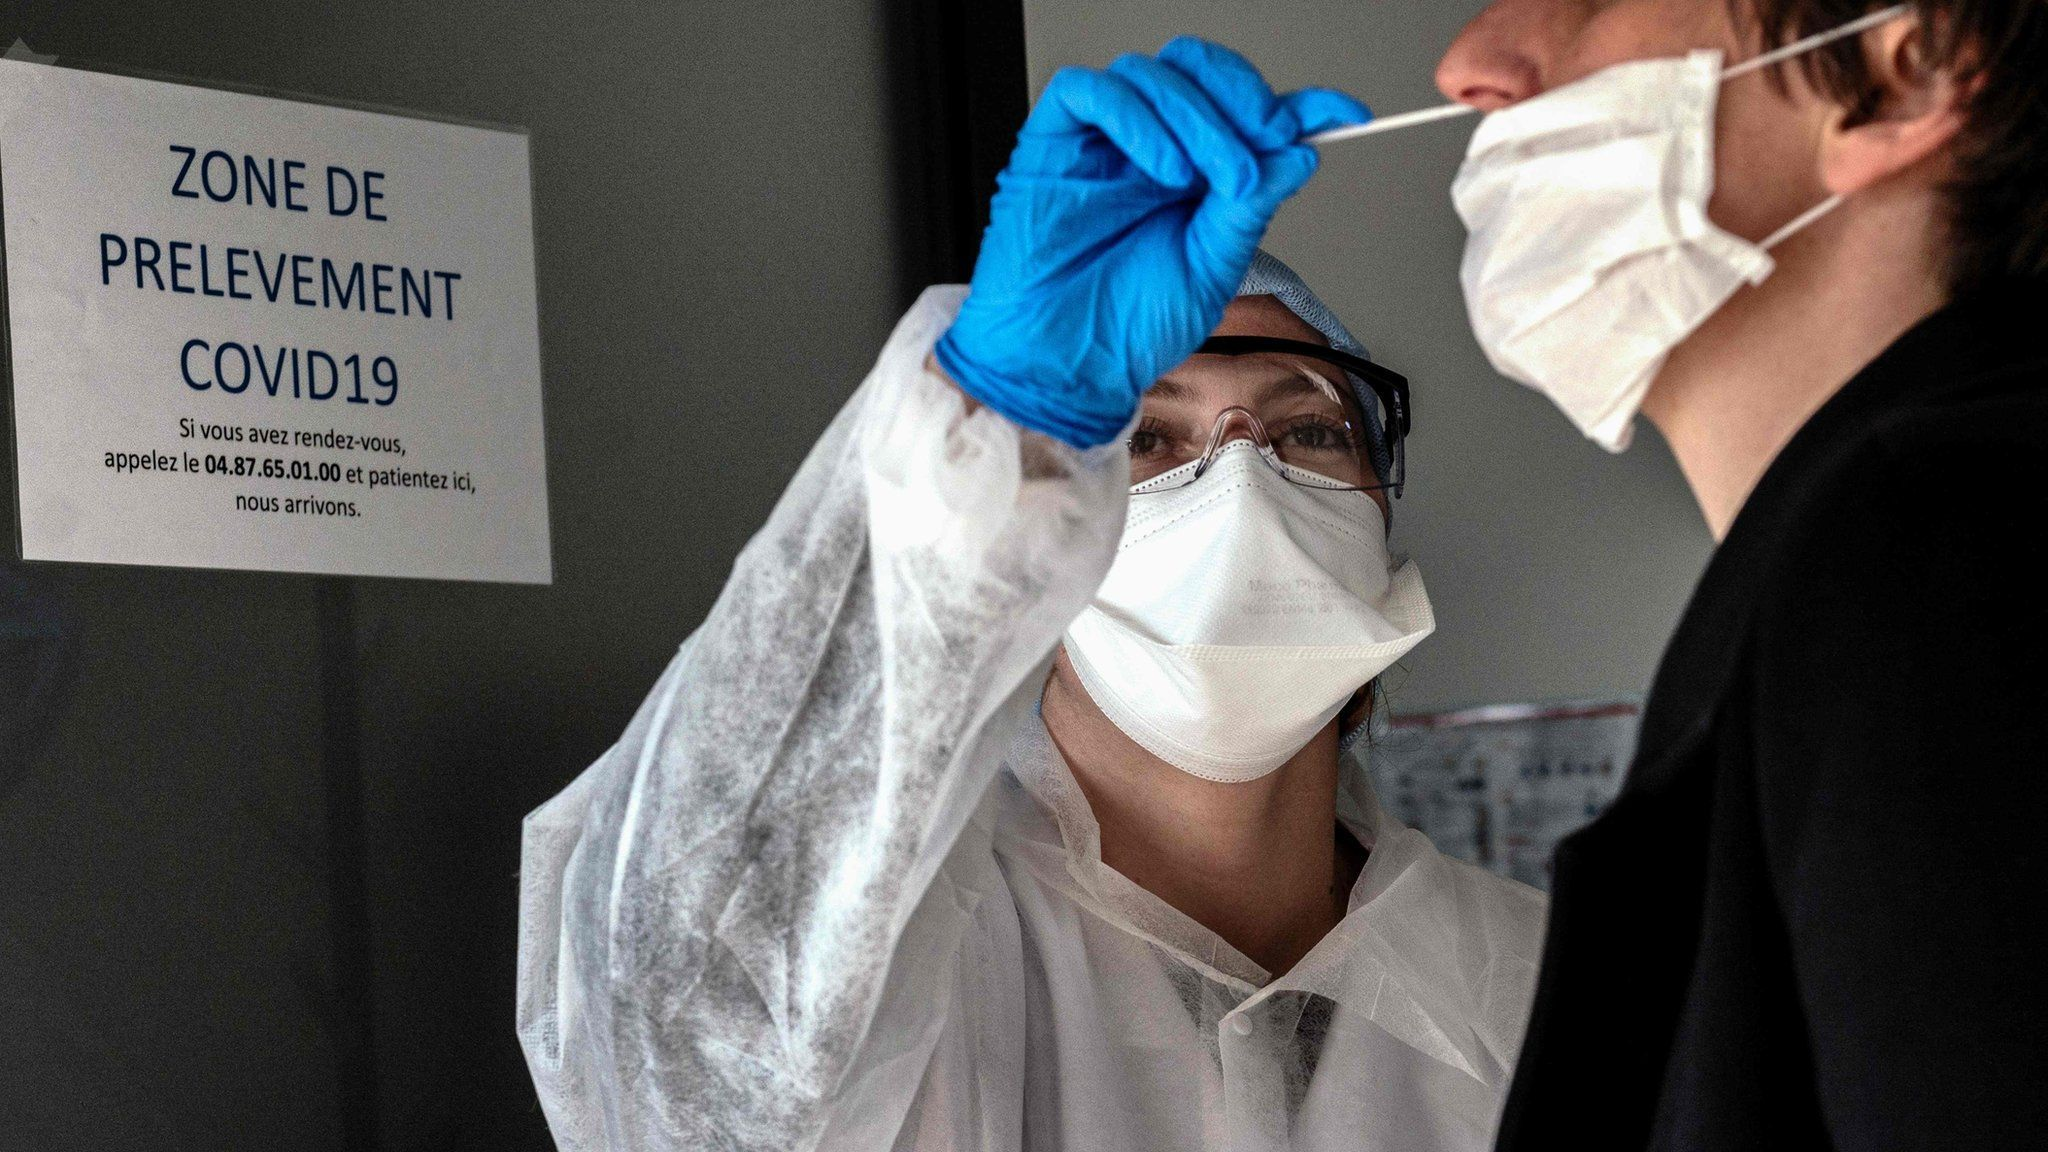

#**Introduction**

##**In light of the waning COVID-19 pandemic, swift and accurate identification of infections continues to play a pivotal role in alleviating the strain on healthcare systems. This project, utilizing a dataset, aims to develop a machine learning model for predicting COVID-19 outcomes. With approximately 2,78,848 individuals who underwent RT-PCR testing, the dataset encompasses key features believed to influence infection likelihood. By harnessing the power of predictive modeling, this project aspires to provide valuable insights for medical professionals, assisting in more effective patient treatment and resource allocation. The significance lies in the ability to create a robust model capable of swiftly categorizing individuals as COVID-positive or negative, thereby aiding in the optimization of healthcare resources. As we navigate the data collected from March 11, 2020, to April 30, 2020, the objective is to contribute to the global effort in managing and mitigating the impact of the pandemic.**

#**Importing all the essential libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #Importing the missingno library for visualizing missing data

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



# Check version information
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
# ... add version information for other libraries

# Print a message indicating successful import
print("All libraries imported successfully!")


Pandas version: 1.5.3
NumPy version: 1.23.5
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
All libraries imported successfully!


In [2]:
# Loading the dataset and assigning it to a variable.
covid_df = pd.read_csv("/content/drive/MyDrive/dataframes/corona_tested_006.csv")



#**Understanding the structure shape and dtypes of the dataset**



In [3]:

# Top 5 rows of the dataset
covid_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
# Bottom 5 rows of the dataset
covid_df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [5]:
# Total rows and columns of the dataset
covid_df.shape

(278848, 11)

In [6]:

# Dropping the 'Ind_ID' column from the dataset
covid_df.drop(columns="Ind_ID",inplace=True)

In [7]:
# Information of the datatypes of the variables
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            278848 non-null  object
 1   Cough_symptoms       278848 non-null  object
 2   Fever                278848 non-null  object
 3   Sore_throat          278848 non-null  object
 4   Shortness_of_breath  278848 non-null  object
 5   Headache             278848 non-null  object
 6   Corona               278848 non-null  object
 7   Age_60_above         278848 non-null  object
 8   Sex                  278848 non-null  object
 9   Known_contact        278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [8]:
# All columns of the dataset
covid_df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [9]:
# Looking for unique values in the dataset
covid_df.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
Known_contact           3
dtype: int64

##**Some important observation to be noted:-**



*   From the above shape function we saw there are 278848 rows in total and 11 columns.
*   By using the unique function we came to know that there are some anomalies in some columns which need to be fixed later on.












#**Check for missing values, outliers, and anomalies.**

In [10]:
# Looking for null values if any
covid_df.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [11]:

# Counting the values of the categorical variables
columns_of_interest = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath",
                        "Headache", "Corona", "Age_60_above", "Sex", "Known_contact"]

for column in columns_of_interest:
    print(f"{column}:\n{covid_df[column].value_counts()}\n{'-->'*20}")


Cough_symptoms:
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
Fever:
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
Sore_throat:
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
Shortness_of_breath:
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
Headache:
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
Corona:
negative    260227
positive     14729
other         3892
N

##**Some important observation to be noted:-**

*   By the use of value_counts function we found the count of unique variables of each columns
*   There are no null values but as we have seen in using the value_counts there are 3 or more catagories in some columns where it needs to be just 2 and the null values are written as none.

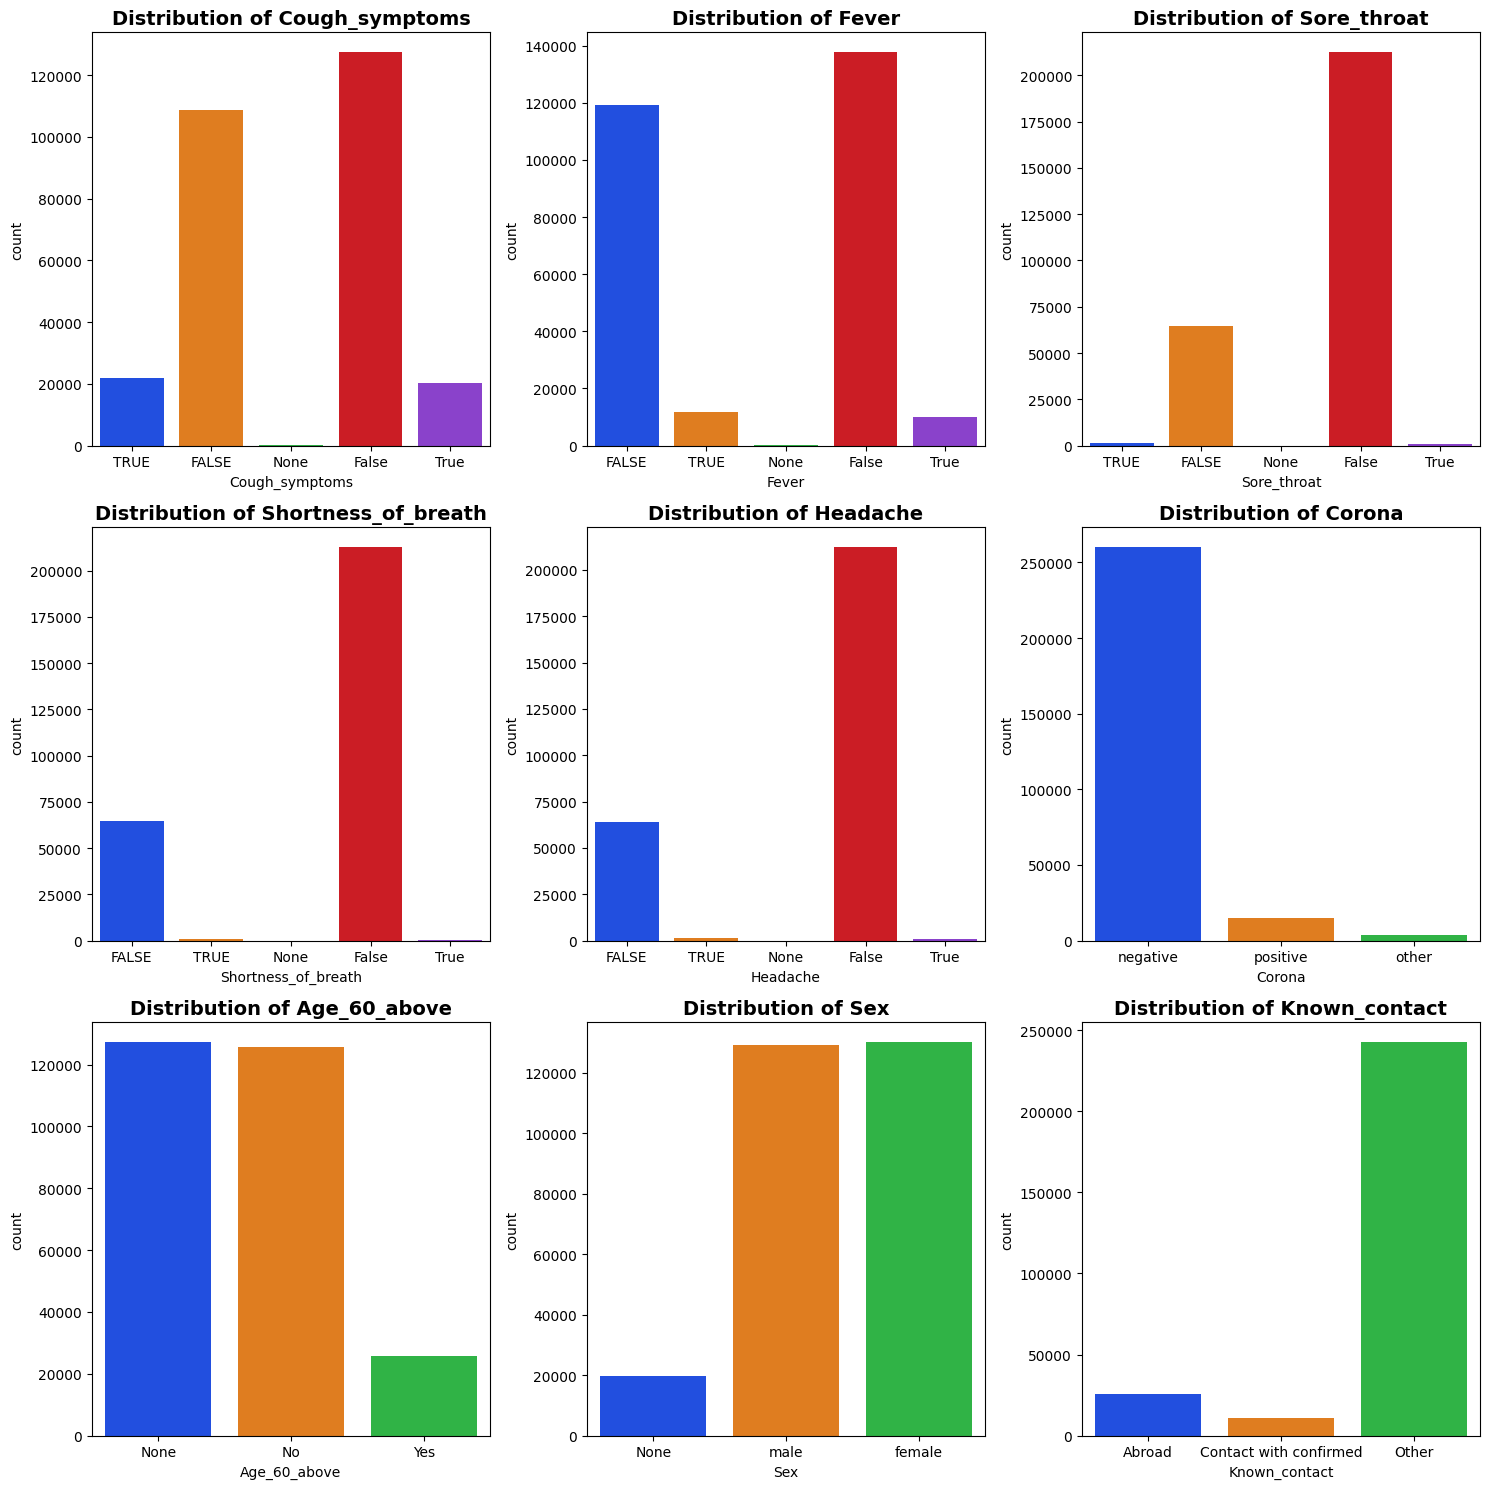

In [12]:
# Defining the figure size for the subplots
plt.figure(figsize=(15, 15))

# Define the list of categorical columns
categorical_columns = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath",
                        "Headache", "Corona", "Age_60_above", "Sex", "Known_contact"]


# Iterating through each categorical column for univariate analysis
for i, column in enumerate(categorical_columns, 1):
    # Creating a subplot for the current column
    plt.subplot(3, 3, i)

    # Using a bright color palette for better visualization
    sns.countplot(data=covid_df, x=column, palette="bright")

    # Adding a dynamic title for each subplot based on the column name
    plt.title(f"Distribution of {column}", fontsize=14, fontweight="bold")

# Adjusting the layout for better visualization
plt.tight_layout()

# Displaying the subplots
plt.show()



###***As we can see there are different anomalies and due to which the distrubition looks a bit messy.Hence in he next part which is going to be the data preprocessing part we are going to take care of all these things.***

#**Dealing with anomalies Outliers and Missing values**

In [13]:
columns_to_lower = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath",
                     "Headache", 'Sex', 'Age_60_above']

# Convert to string and apply lowercase to specified columns
covid_df[columns_to_lower] = covid_df[columns_to_lower].astype(str).apply(lambda x: x.str.lower())


In [14]:
# Counting the values of the catagirical variables
columns_of_interest = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath",
                        "Headache", "Corona", "Age_60_above", "Sex", "Known_contact"]

for column in columns_of_interest:
    print(f"{column}:\n{covid_df[column].value_counts()}\n{'</>'*20}")
print("{These are value counts of all the categories of every columns}")

Cough_symptoms:
false    236368
true      42228
none        252
Name: Cough_symptoms, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Fever:
false    256844
true      21752
none        252
Name: Fever, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Sore_throat:
false    276921
true       1926
none          1
Name: Sore_throat, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Shortness_of_breath:
false    277270
true       1577
none          1
Name: Shortness_of_breath, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Headache:
false    276433
true       2414
none          1
Name: Headache, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Corona:
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
</></></></></></></></></></></></></></></></></></></></>
Age_60_above:
none    127320
no      125703
yes      25825
Name: Age_60_a

In [15]:
# Converting the None values to null
category_to_replace = 'none'

columns_to_replace = ['Sex', 'Age_60_above', 'Headache', 'Shortness_of_breath', 'Fever', 'Sore_throat', 'Cough_symptoms']

for column in columns_to_replace:
    covid_df[column].replace(to_replace=category_to_replace, value=np.nan, inplace=True)

In [16]:
covid_df["Corona"].replace(to_replace="other", value=np.nan, inplace=True)

In [17]:
covid_df.isnull().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

<Axes: >

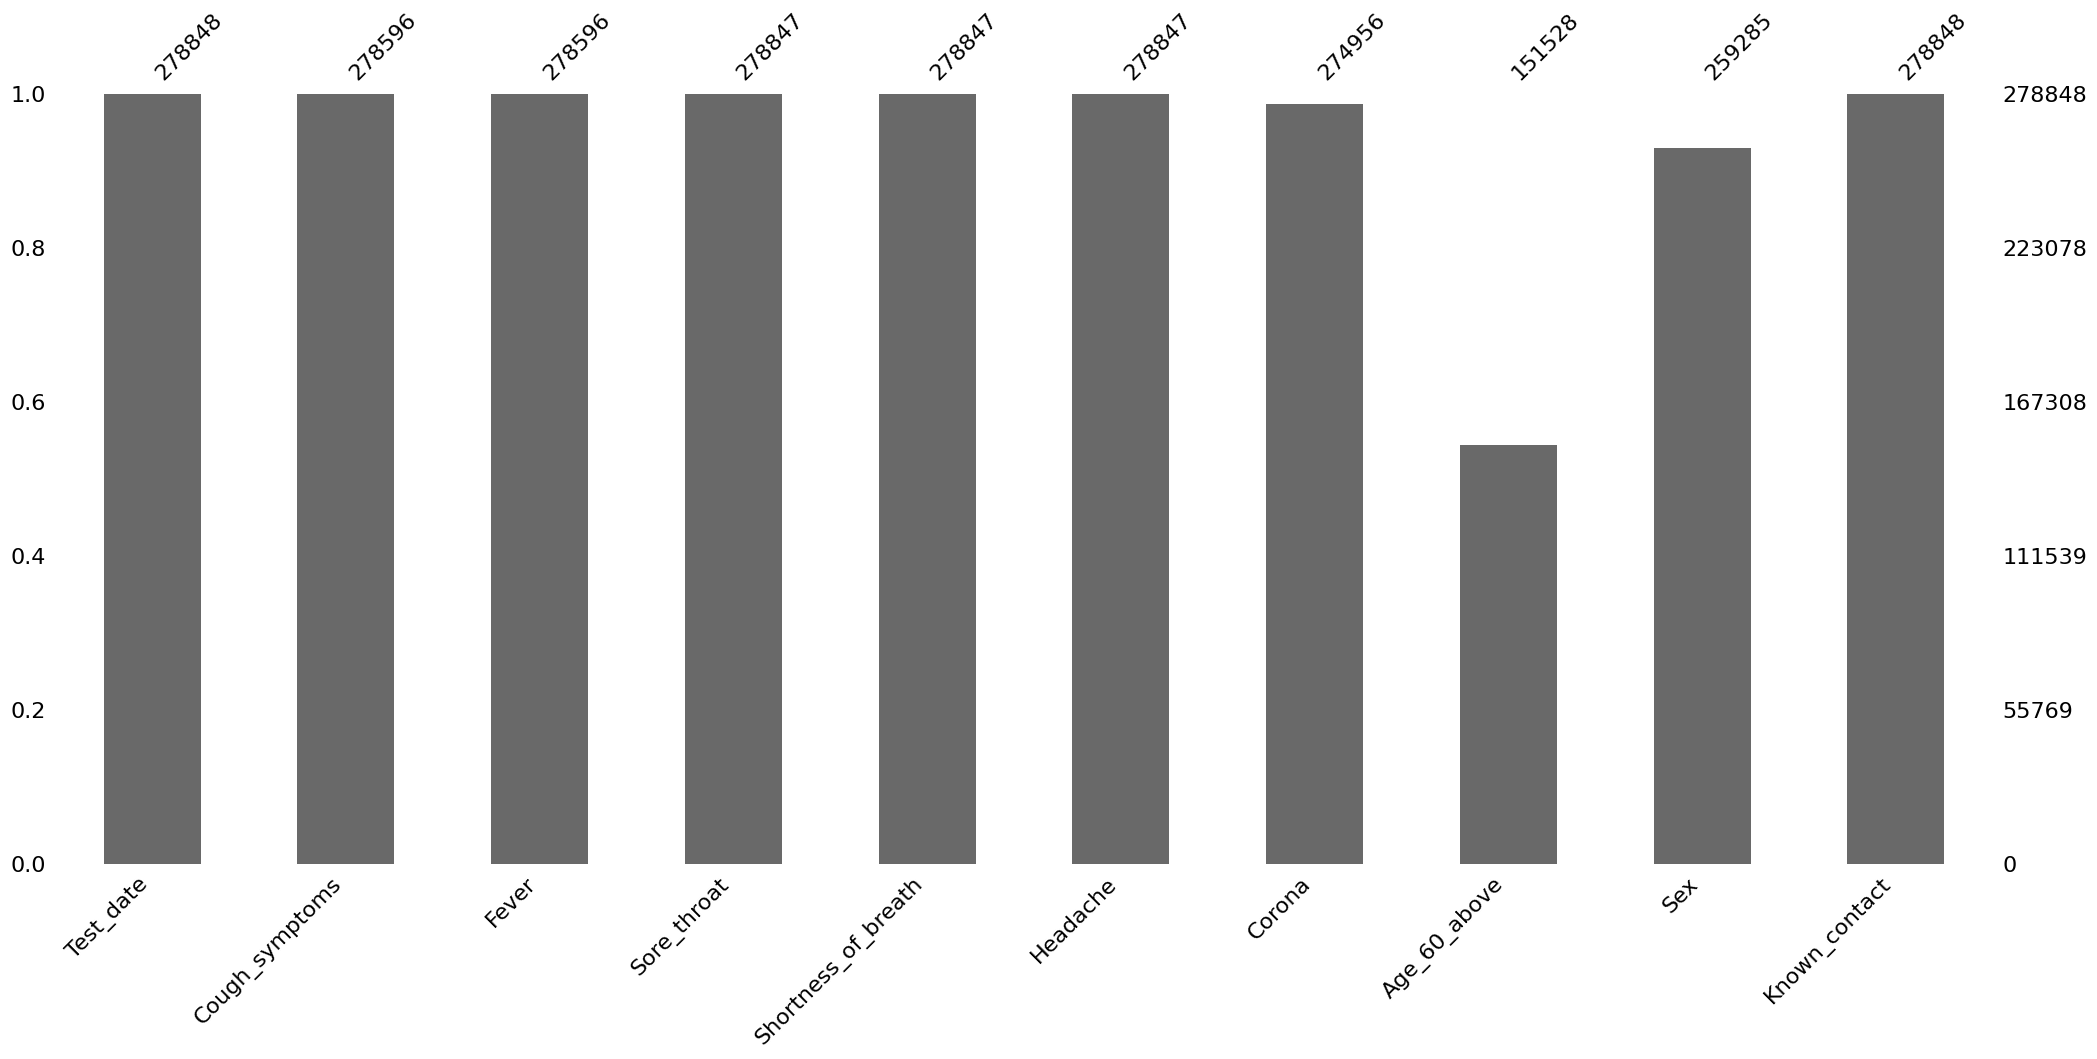

In [18]:
msno.bar(covid_df)

##***This plot shows the missing values present in the columns(Cough_symptoms,Fever,Corona,....etc).***

<Axes: >

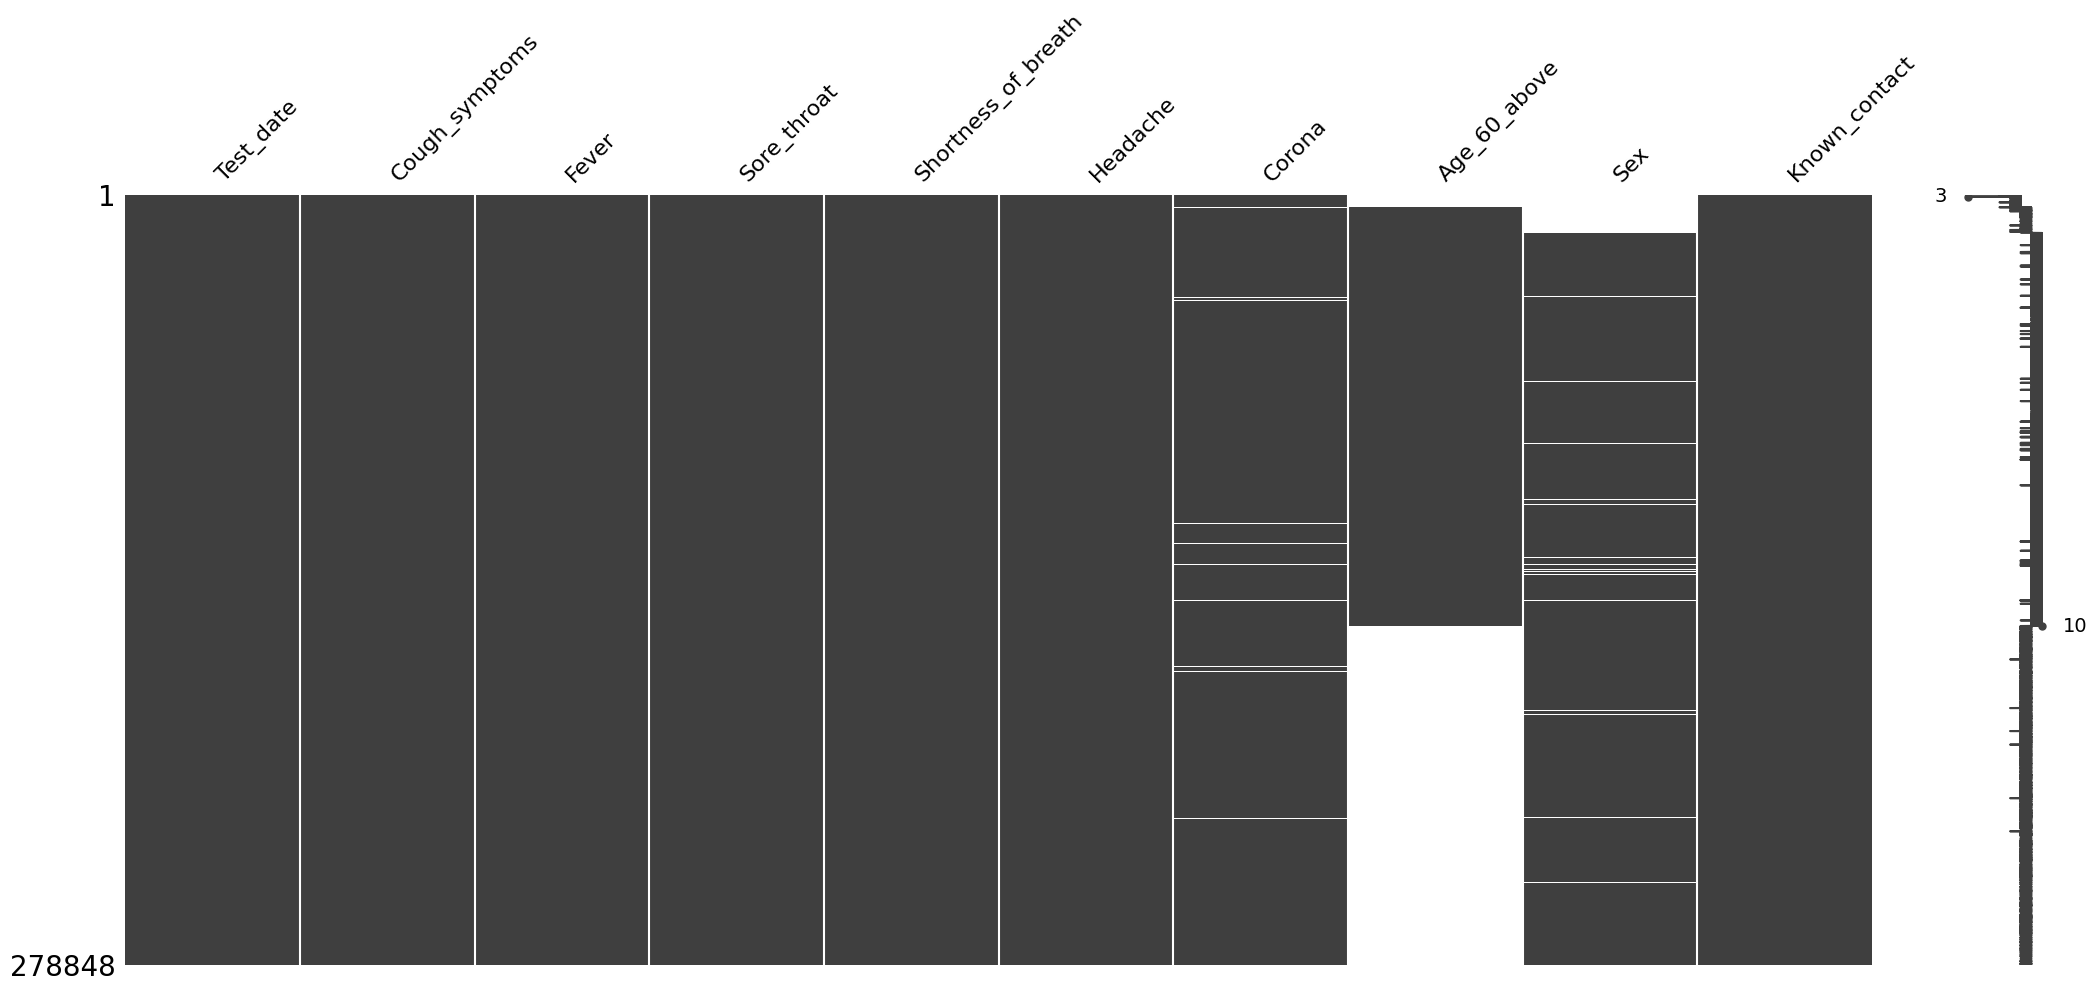

In [19]:
msno.matrix(covid_df)

##***This plot is used to see that the values are missing at random or is there any pattern behind it.***

<Axes: >

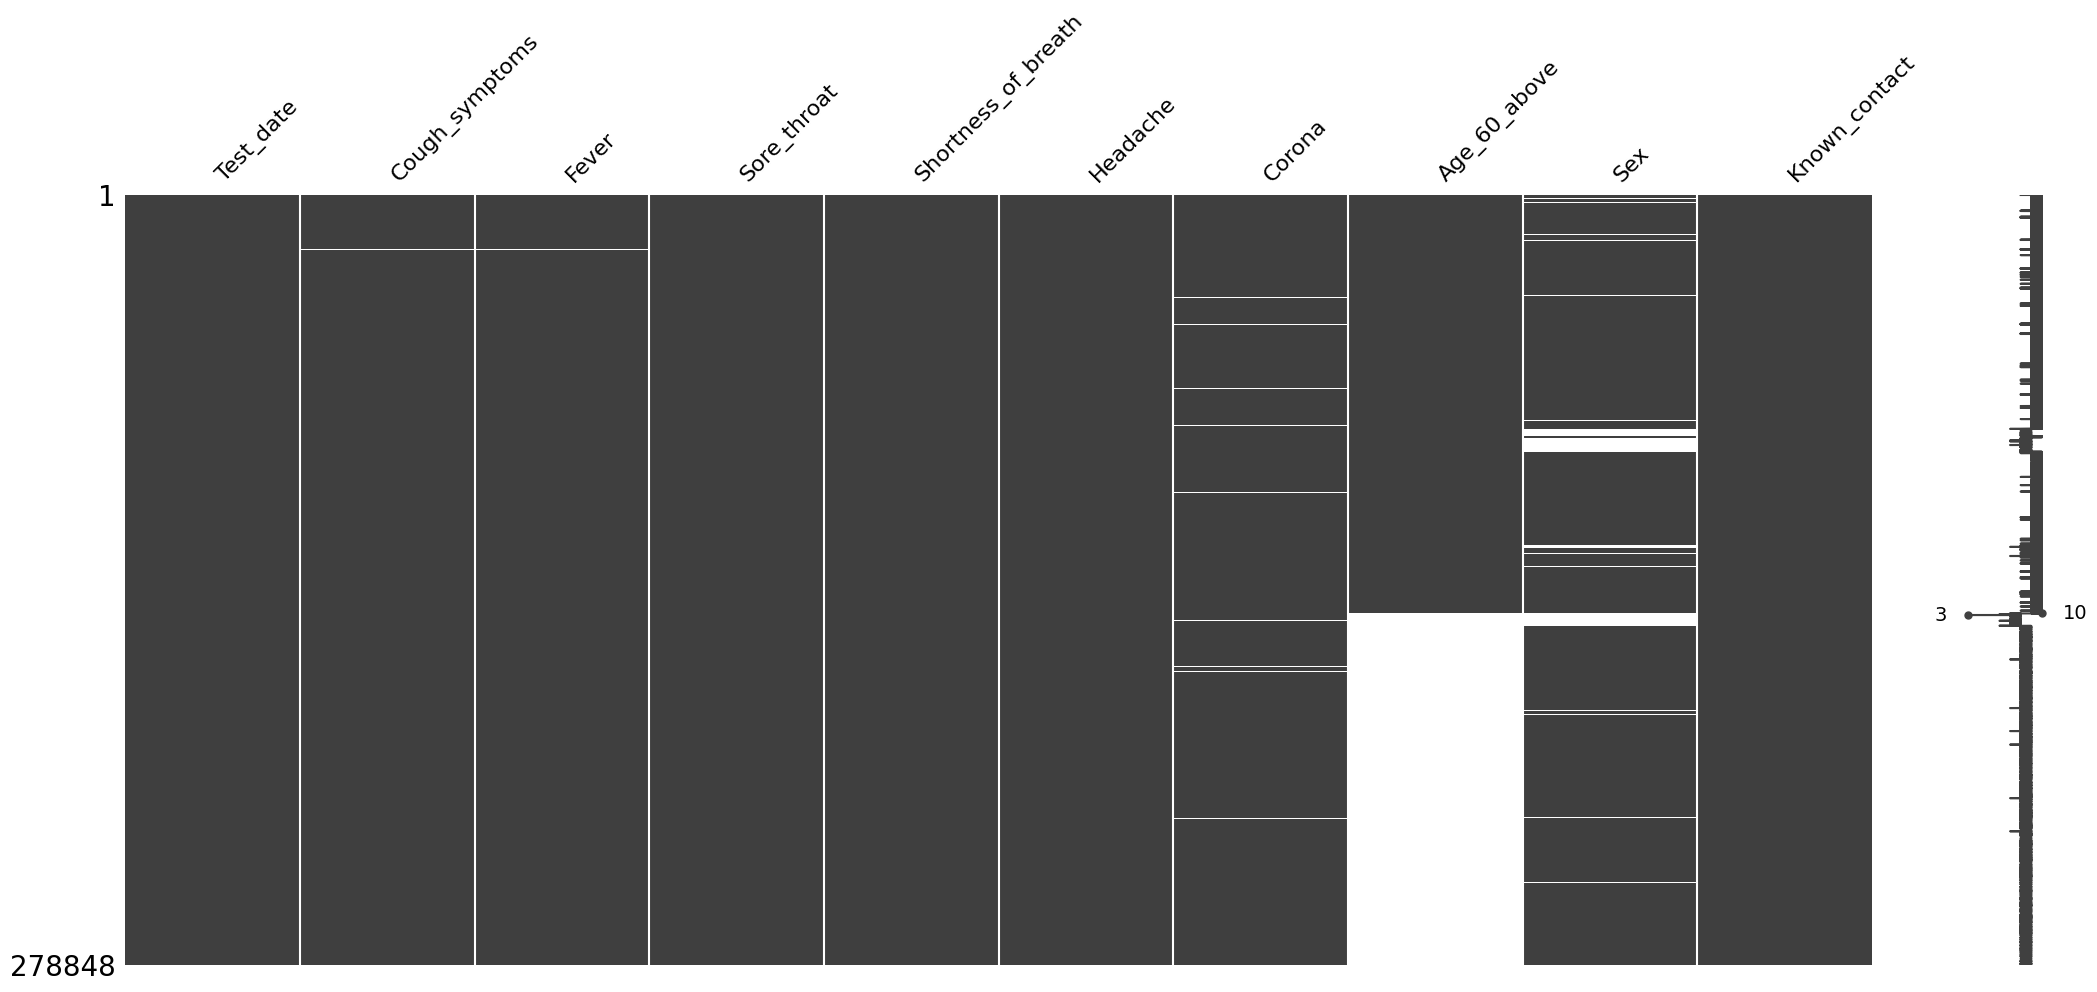

In [20]:
sort_by_age = covid_df.sort_values("Age_60_above")
msno.matrix(sort_by_age)

<Axes: >

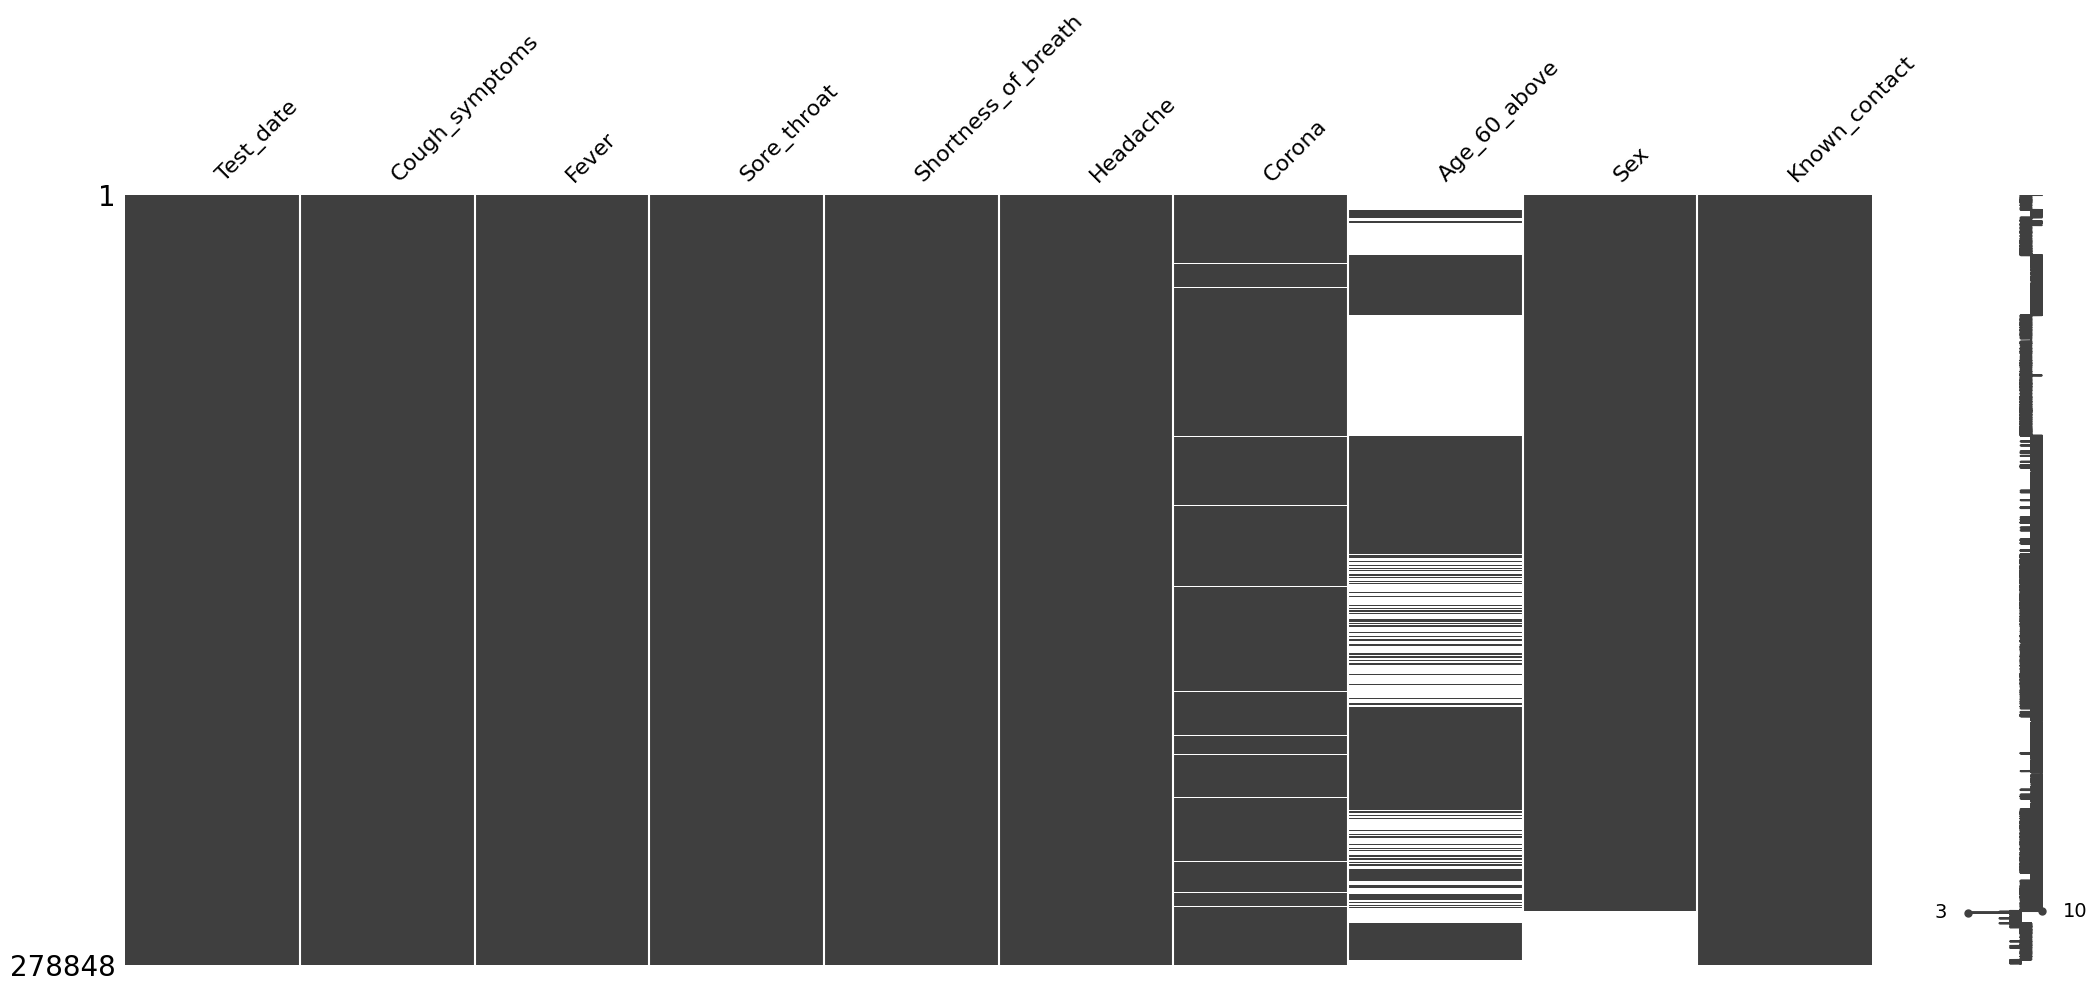

In [21]:
sort_by_sex = covid_df.sort_values("Sex")
msno.matrix(sort_by_sex)

###***We have successfully addressed anomalies within our dataset by replacing 'None' values with <NA>, thereby standardizing the representation of missing data. Furthermore, to enhance the dataset's uniformity and reduce potential complications during subsequent analyses, we have converted all values to lowercase. This ensures a consistent and harmonized dataset, where variations in case no longer impact the interpretation of the information. This meticulous data preprocessing lays a solid foundation for more accurate and reliable analyses moving forward.***

#**Unveiling Data's Symphony: A Harmonious Exploration through Univariate, Bivariate, and Multivariate Analysis.**

##**visiluazing the dataset before imputation**

In [22]:
covid_df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

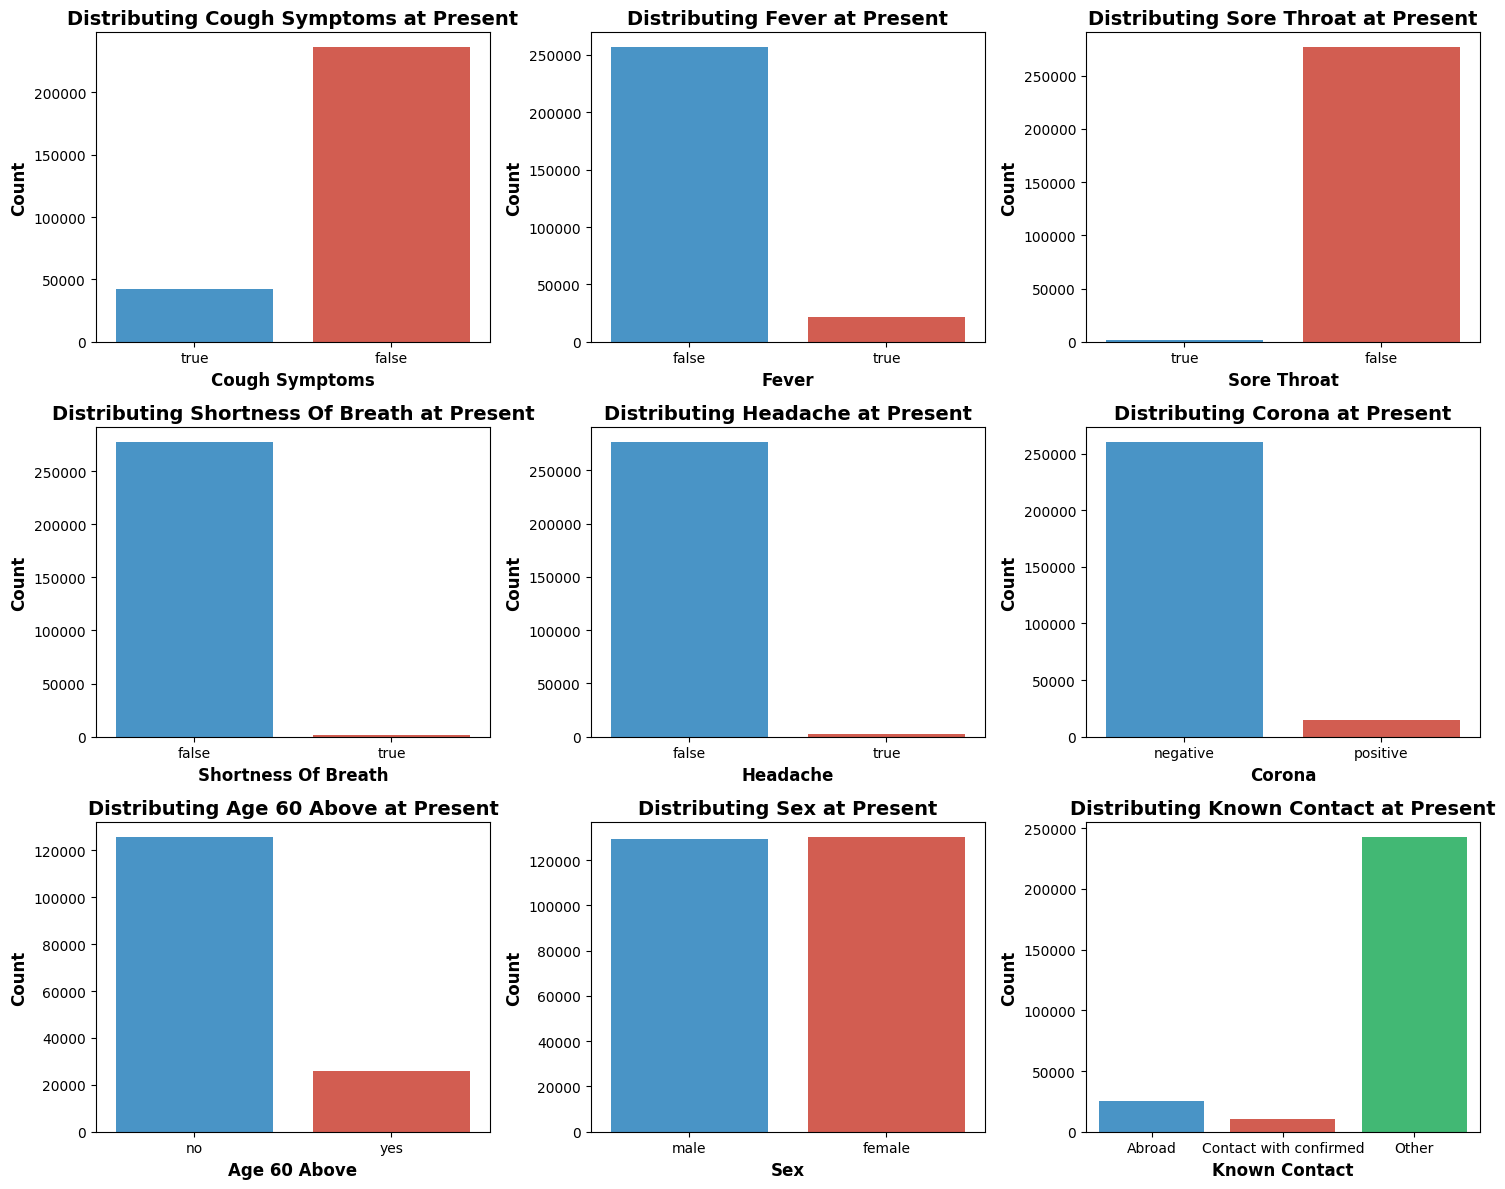

In [23]:

# Setting a custom color palette
custom_colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#8e44ad"]

# Setting the figure size
plt.figure(figsize=(15, 12))

# Listing categorical variables
categorical_vars = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
                     'Corona', 'Age_60_above', 'Sex', 'Known_contact']

# Creating subplots for univariate analysis
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=covid_df, palette=custom_colors)
    plt.title(f'Distributing {var.replace("_", " ").title()} at Present', fontsize=14, fontweight='bold')
    plt.xlabel(var.replace("_", " ").title(), fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots

plt.show()



## ***In the presented subplots, we observe the count distribution of various columns. Notably, among the five symptoms, cough exhibits the highest count, followed by fever. Additionally, the dataset displays a slight predominance of females over males. Furthermore, in the known contact category, 'other' surpasses 'abroad,' 'contact with confirmed,' indicating higher counts. Lastly, the label variable demonstrates an imbalance.***

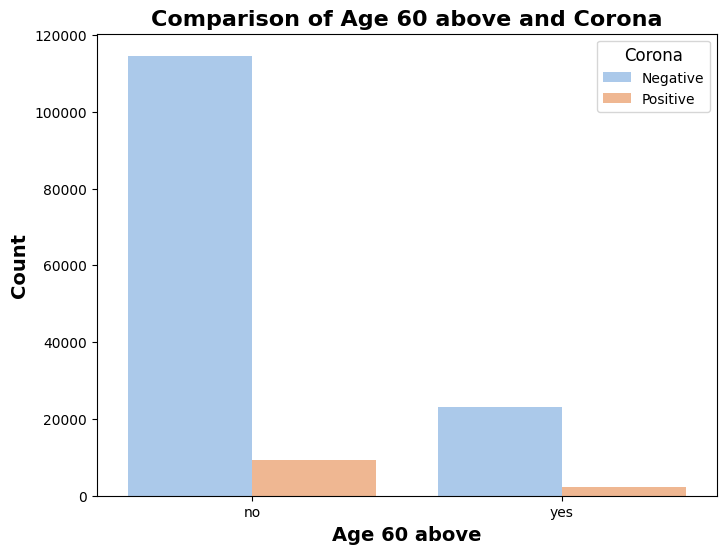

In [24]:
# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a count plot
sns.countplot(x='Age_60_above', hue='Corona', data=covid_df, palette='pastel')

# Adding labels and title
plt.xlabel('Age 60 above', size=14, fontweight='bold')
plt.ylabel('Count', size=14, fontweight='bold')
plt.title('Comparison of Age 60 above and Corona', size=16, fontweight='bold')
plt.legend(title='Corona', title_fontsize='12', labels=['Negative', 'Positive'])

# Displaying the plot
plt.show()

##***Upon assessing the plot, it becomes evident that individuals aged 60 and above are more susceptible to contracting COVID-19. This observation aligns with the common understanding that as individuals age, their immune systems tend to weaken, rendering them more vulnerable to viral infections, such as the one caused by the coronavirus.***

In [25]:
covid_df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [26]:


# Creating a cross-tabulation
cross_tab = pd.crosstab(covid_df['Known_contact'], covid_df['Corona'])

# Displaying the cross-tabulation
print(cross_tab)


Corona                  negative  positive
Known_contact                             
Abroad                     23205      1869
Contact with confirmed      3160      7318
Other                     233862      5542


###***This crosstab shows the distribution of COVID-19 cases (positive or negative) categorized by whether the individuals had known contact with confirmed cases and the nature of that contact. For instance, a significant number of cases in the "Other" category suggests that many individuals in the dataset contracted the virus without a known contact abroad or with a confirmed case.***

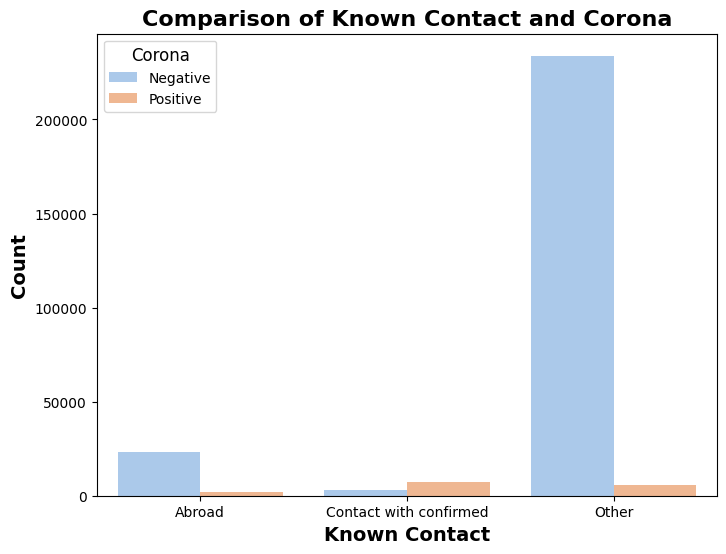

In [27]:

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a count plot
sns.countplot(x='Known_contact', hue='Corona', data=covid_df, palette='pastel')

# Adding labels and title
plt.xlabel('Known Contact', size=14, fontweight='bold')
plt.ylabel('Count', size=14, fontweight='bold')
plt.title('Comparison of Known Contact and Corona', size=16, fontweight='bold')
plt.legend(title='Corona', title_fontsize='12', labels=['Negative', 'Positive'])

# Displaying the plot
plt.show()


###***The observation that individuals who had contact with confirmed cases are more likely to be positive for COVID-19 is intuitive and aligns with expectations. Close contact with an already confirmed case increases the risk of transmission. This finding emphasizes the importance of contact tracing and monitoring individuals who have been in contact with confirmed COVID-19 cases to mitigate the spread of the virus.***


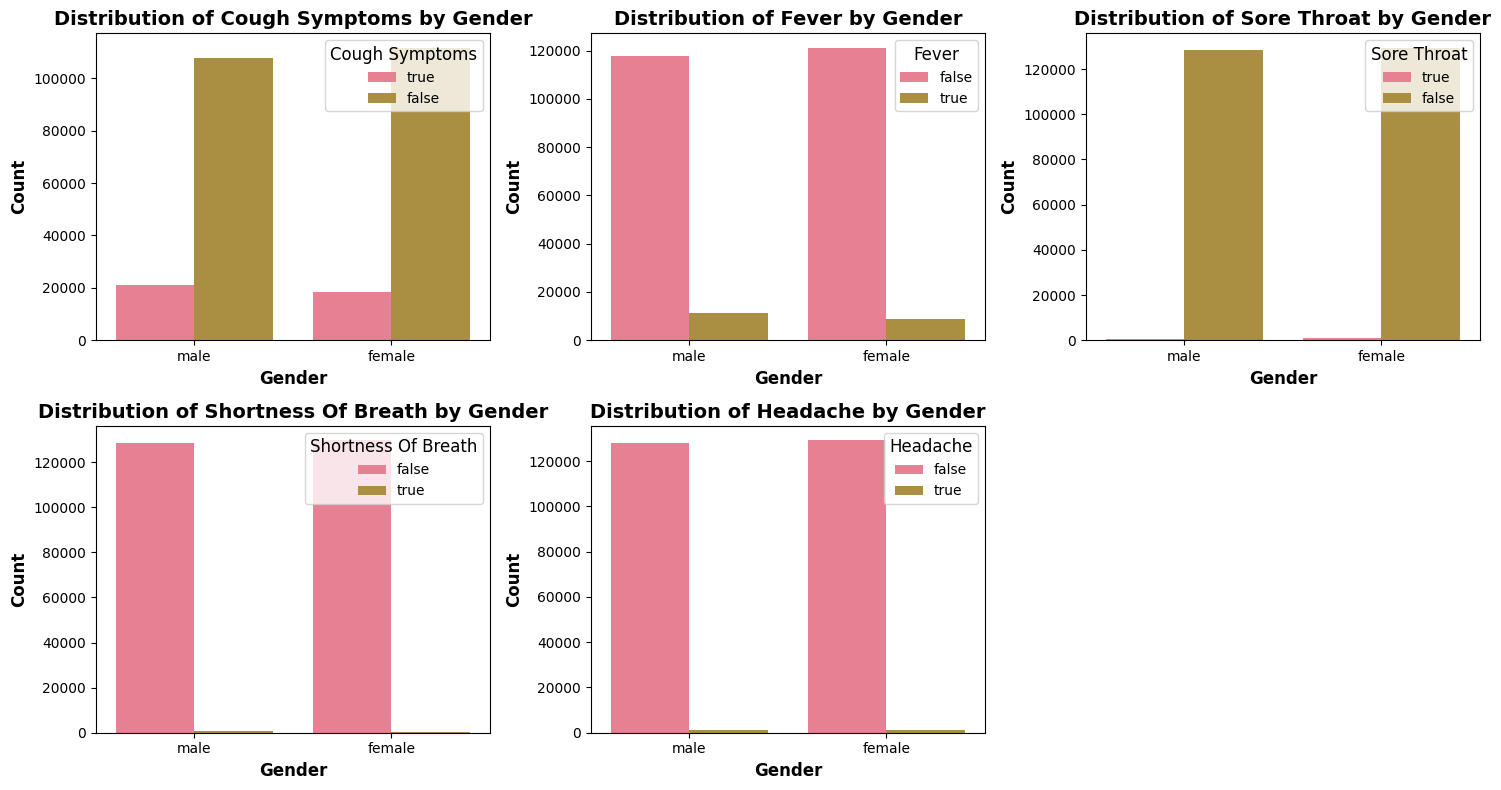

In [28]:

# Setting color palette
sns.set_palette("husl")

# Setting the figure size
plt.figure(figsize=(15, 8))

# List of symptoms
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Creating subplots
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x='Sex', hue=symptom, data=covid_df)
    plt.title(f'Distribution of {symptom.replace("_", " ").title()} by Gender', fontsize=14, fontweight='bold')
    plt.xlabel("Gender", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')
    plt.legend(title=symptom.replace("_", " ").title(), title_fontsize='12')

# Adjusting layout
plt.tight_layout()

# Displaying the subplots
plt.show()




###***The subplot comparing different symptoms with gender reveals that there are more males experiencing cough symptoms and fever. This observation highlights a potential gender-related variation in the prevalence of certain symptoms associated with COVID-19. Further investigation into the reasons behind such differences may contribute to a better understanding of the virus's impact on different demographic groups.***

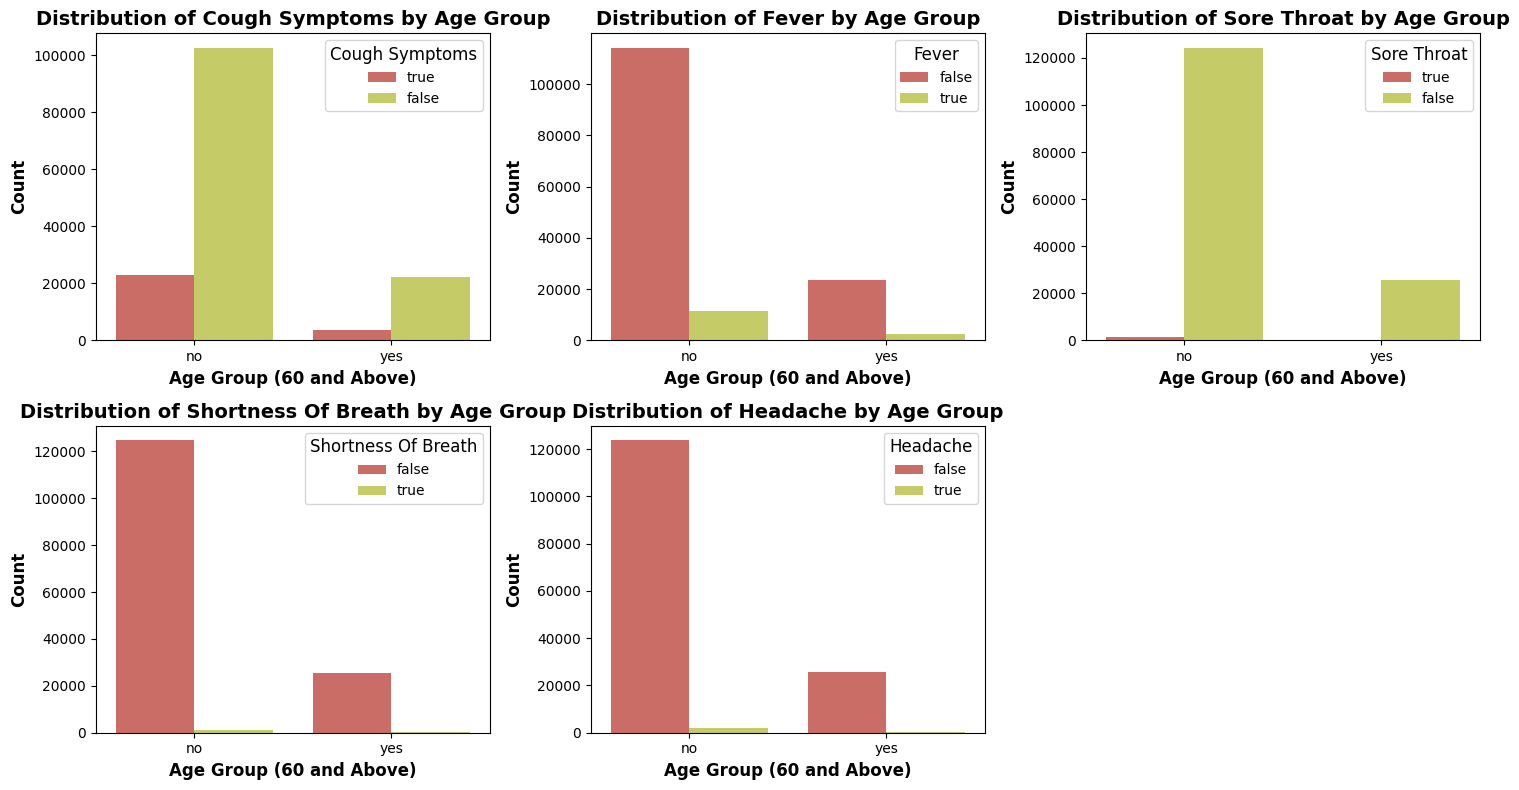

In [29]:

# Set a bright color palette
sns.set_palette("hls")

# Set the figure size
plt.figure(figsize=(15, 8))

# List of symptoms
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Create subplots
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x='Age_60_above', hue=symptom, data=covid_df)
    plt.title(f'Distribution of {symptom.replace("_", " ").title()} by Age Group', fontsize=14, fontweight='bold')
    plt.xlabel("Age Group (60 and Above)", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')
    plt.legend(title=symptom.replace("_", " ").title(), title_fontsize='12')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


###***As we can see in the above plot most of the people suffering with cough and fever symptomes are of age less then 60.***

# **Data Preperation**


* Imputation




In [30]:
covid_df.isnull().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [31]:

from sklearn.impute import SimpleImputer


columns_with_missing_values = covid_df.columns[covid_df.isnull().any()]

# Creating an imputer
imputer = SimpleImputer(strategy='most_frequent')

# Fitting the imputer on the data and transform the columns with missing values
covid_df[columns_with_missing_values] = imputer.fit_transform(covid_df[columns_with_missing_values])

# Verifing that there are no more missing values
print(covid_df.isnull().sum())

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64


<Axes: >

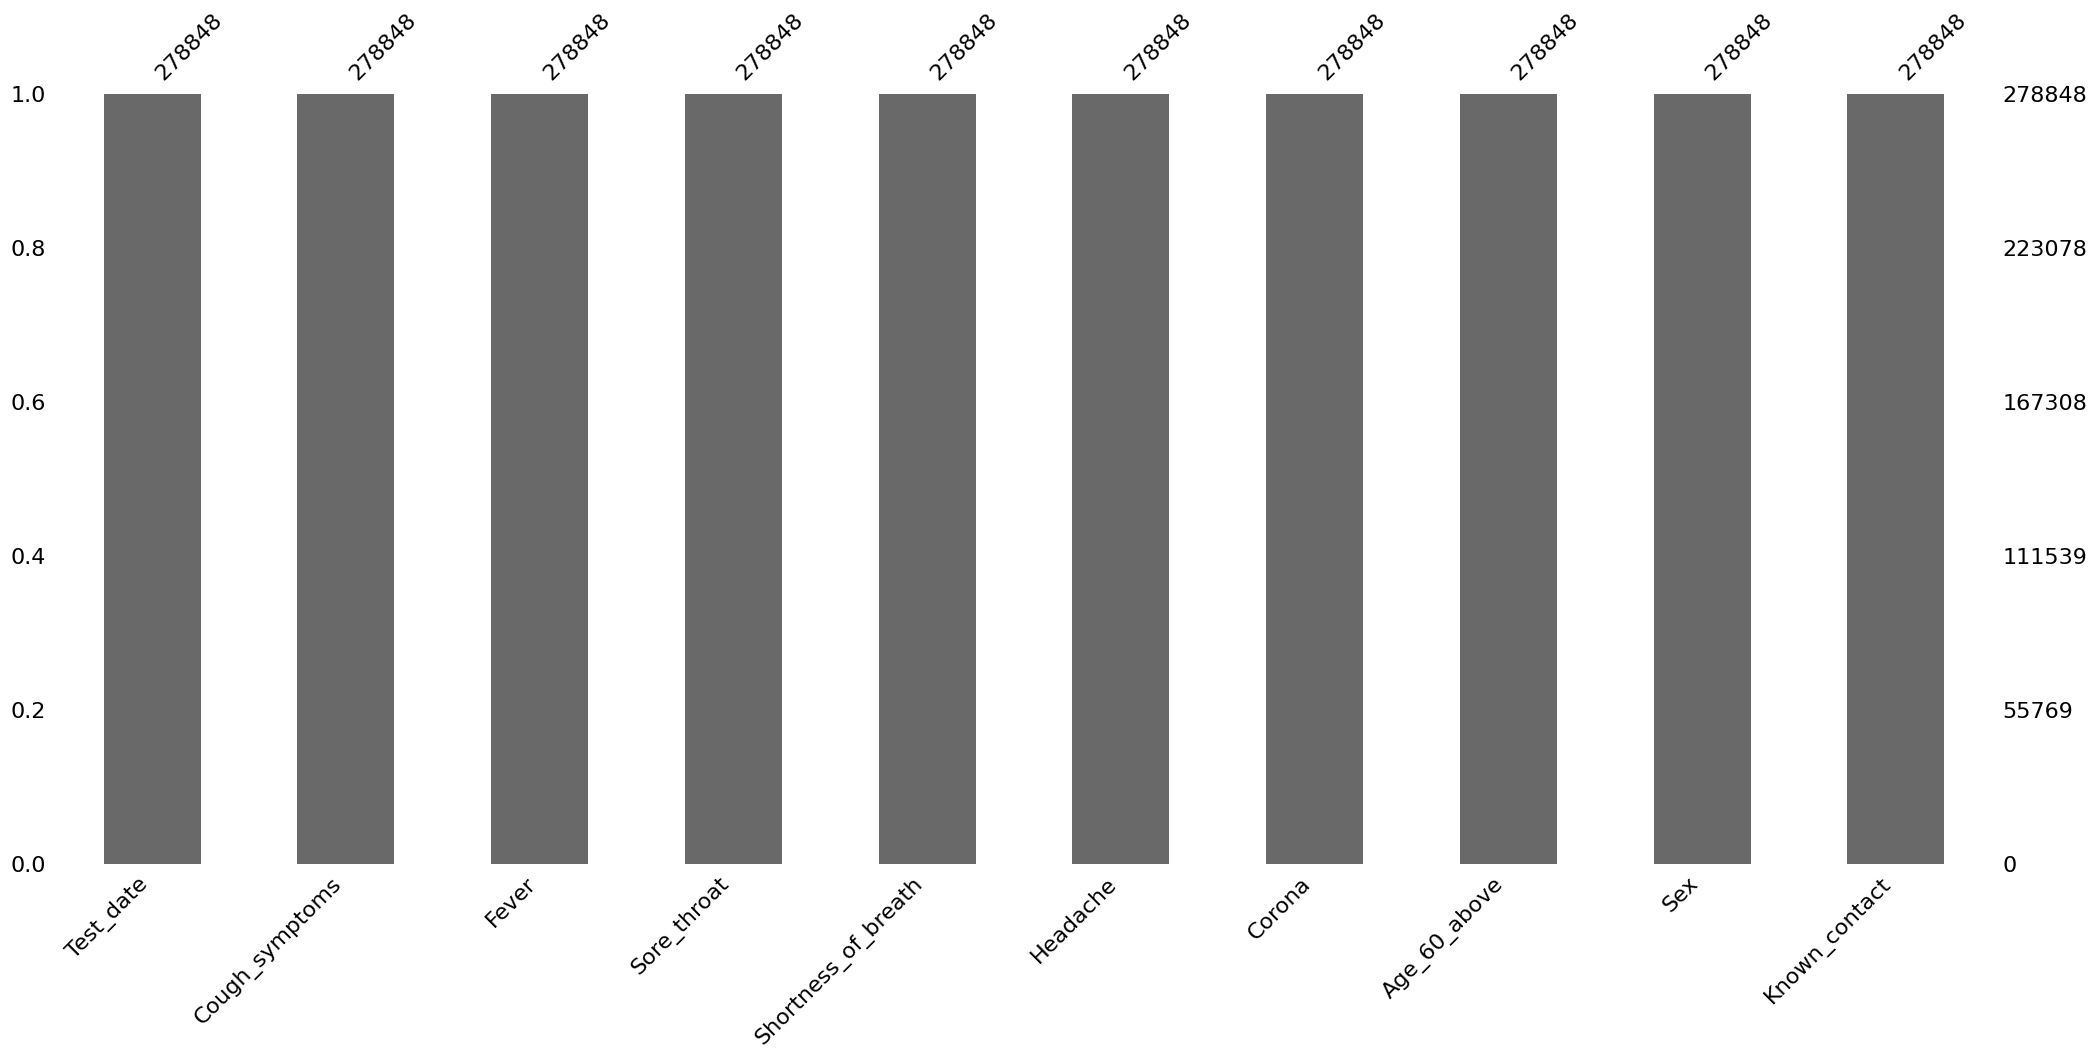

In [32]:
msno.bar(covid_df)

###***We have successfully imputed the null values with most frequent .***

In [35]:
# changing the test date dtype to datetime
covid_df['Test_date'] = pd.to_datetime(covid_df['Test_date'], format='%d-%m-%Y')

# Displaying the modified DataFrame
print(covid_df.head())

   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0 2020-03-11           true  false        true               false    false   
1 2020-03-11          false   true       false               false    false   
2 2020-03-11          false   true       false               false    false   
3 2020-03-11           true  false       false               false    false   
4 2020-03-11           true  false       false               false    false   

     Corona Age_60_above     Sex           Known_contact  
0  negative           no  female                  Abroad  
1  positive           no  female                  Abroad  
2  positive           no  female                  Abroad  
3  negative           no  female                  Abroad  
4  negative           no  female  Contact with confirmed  


#**Hyopthesis testing**


In [37]:
covid_table=pd.crosstab(covid_df["Age_60_above"],covid_df["Corona"])
print(covid_table)

Corona        negative  positive
Age_60_above                    
no              240498     12525
yes              23621      2204


In [38]:
#observed values
observed_values = covid_table.values
print("observed values:-\n",observed_values)

observed values:-
 [[240498  12525]
 [ 23621   2204]]


In [39]:
import scipy.stats as stats
val = stats.chi2_contingency(covid_table)
val

Chi2ContingencyResult(statistic=600.9907438227524, pvalue=1.0193061909600926e-132, dof=1, expected_freq=array([[239658.09952734,  13364.90047266],
       [ 24460.90047266,   1364.09952734]]))

In [40]:
Expected_values=val[3]

In [41]:
no_of_rows = len(covid_table.iloc[0:2,0])
no_of_columns= len(covid_table.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom:-",ddof)
alpha=0.05

Degree of freedom:- 1


In [42]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,Expected_values)])
chi_square_statistic = chi_square[0]+chi_square[1]

In [43]:
print("Chi-Square stastic:-",chi_square_statistic)

Chi-Square stastic:- 601.7069332429983


In [44]:
critical_val = chi2.ppf(q=1-alpha,df=ddof)
print('Critical val:-',critical_val)

Critical val:- 3.841458820694124


In [45]:
if chi_square_statistic>=critical_val:
  print("Reject H0,There is a relationship between 2 categorical variables")
else:
  print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


In [46]:
covid_table=pd.crosstab(covid_df["Sex"],covid_df["Corona"])
print(covid_table)

Corona  negative  positive
Sex                       
female    142511      7210
male      121608      7519


In [47]:
#observed values
observed_values = covid_table.values
print("observed values:-\n",observed_values)

observed values:-
 [[142511   7210]
 [121608   7519]]


In [48]:
val = stats.chi2_contingency(covid_table)
val

Chi2ContingencyResult(statistic=140.41458840695748, pvalue=2.160497487725928e-32, dof=1, expected_freq=array([[141812.60327849,   7908.39672151],
       [122306.39672151,   6820.60327849]]))

In [49]:
Expected_values=val[3]

In [50]:
no_of_rows = len(covid_table.iloc[0:2,0])
no_of_columns= len(covid_table.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom:-",ddof)
alpha=0.05

Degree of freedom:- 1


In [51]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,Expected_values)])
chi_square_statistic = chi_square[0]+chi_square[1]

In [52]:
print("Chi-Square stastic:-",chi_square_statistic)

Chi-Square stastic:- 140.61585728138812


In [53]:
critical_val = chi2.ppf(q=1-alpha,df=ddof)
print('Critical val:-',critical_val)

Critical val:- 3.841458820694124


In [54]:
if chi_square_statistic>=critical_val:
  print("Reject H0,There is a relationship between 2 categorical variables")
else:
  print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


In [55]:
covid_df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [56]:
covid_table=pd.crosstab(covid_df["Fever"],covid_df["Corona"])
print(covid_table)

Corona  negative  positive
Fever                     
false     247926      9170
true       16193      5559


In [57]:
#observed values
observed_values = covid_table.values
print("observed values:-\n",observed_values)

observed values:-
 [[247926   9170]
 [ 16193   5559]]


In [58]:
val = stats.chi2_contingency(covid_table)
val

Chi2ContingencyResult(statistic=19378.570935486066, pvalue=0.0, dof=1, expected_freq=array([[243515.96003557,  13580.03996443],
       [ 20603.03996443,   1148.96003557]]))

In [59]:
Expected_values=val[3]

In [60]:
no_of_rows = len(covid_table.iloc[0:2,0])
no_of_columns= len(covid_table.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom:-",ddof)
alpha=0.05

Degree of freedom:- 1


In [61]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,Expected_values)])
chi_square_statistic = chi_square[0]+chi_square[1]

In [62]:
print("Chi-Square stastic:-",chi_square_statistic)

Chi-Square stastic:- 19382.965876855207


In [63]:
critical_val = chi2.ppf(q=1-alpha,df=ddof)
print('Critical val:-',critical_val)

Critical val:- 3.841458820694124


In [64]:
if chi_square_statistic>=critical_val:
  print("Reject H0,There is a relationship between 2 categorical variables")
else:
  print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


###***In the chi-square tests conducted:***

1. Age_60_above and Corona:
   - Hypothesis: Age above 60 and COVID-19 outcome are linked.
   - Result: Rejected null hypothesis, indicating a significant association.

2. Sex and Corona:
   - Hypothesis: Gender and COVID-19 outcome are related.
   - Result: Null hypothesis rejected, highlighting a significant association.

3. Fever and Corona:
   - Hypothesis: Presence of fever and COVID-19 outcome are connected.
   - Result: Null hypothesis rejected, suggesting a meaningful association.***

These tests show that age, gender, and fever have significant associations with COVID-19 outcomes in the dataset.

#**Visualization**

Text(0.5, 1.02, 'Multiple Pie Charts')

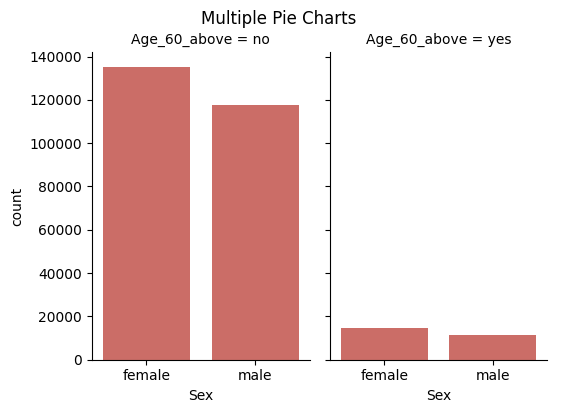

In [65]:
g = sns.catplot(x='Sex', col='Age_60_above', data=covid_df, kind='count', height=4, aspect=0.7)
g.fig.suptitle('Multiple Pie Charts', y=1.02)


In [66]:
covid_df.columns


Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

Text(0.5, 1.0, 'Grouped Bar Chart')

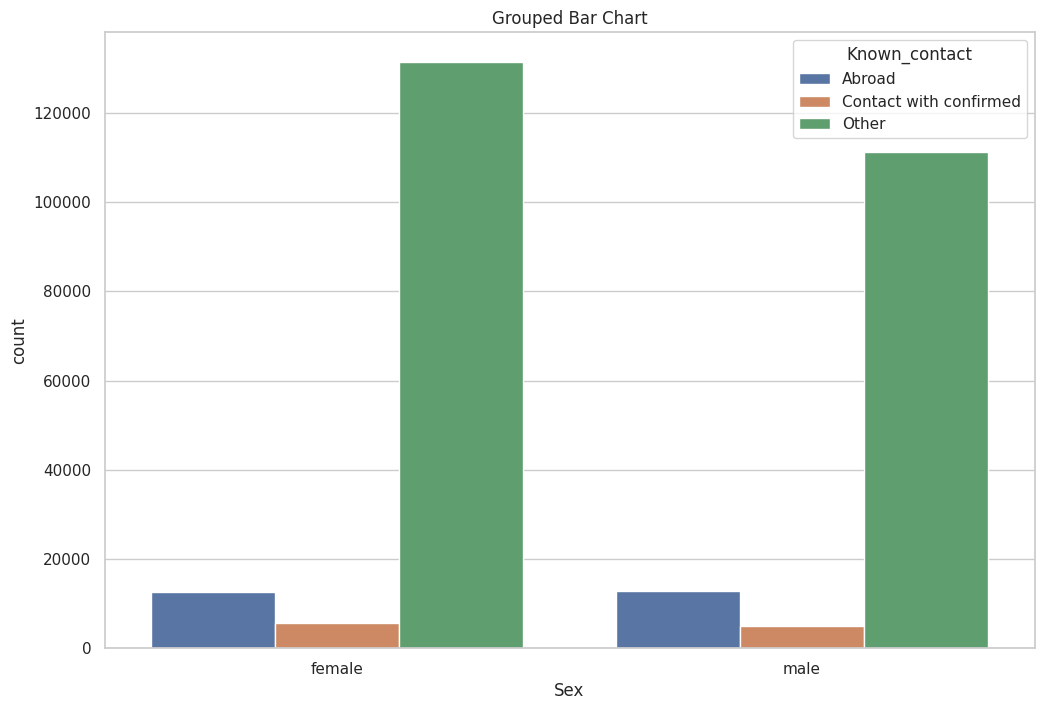

In [69]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Sex', hue='Known_contact', data=covid_df, dodge=True)
plt.title('Grouped Bar Chart')


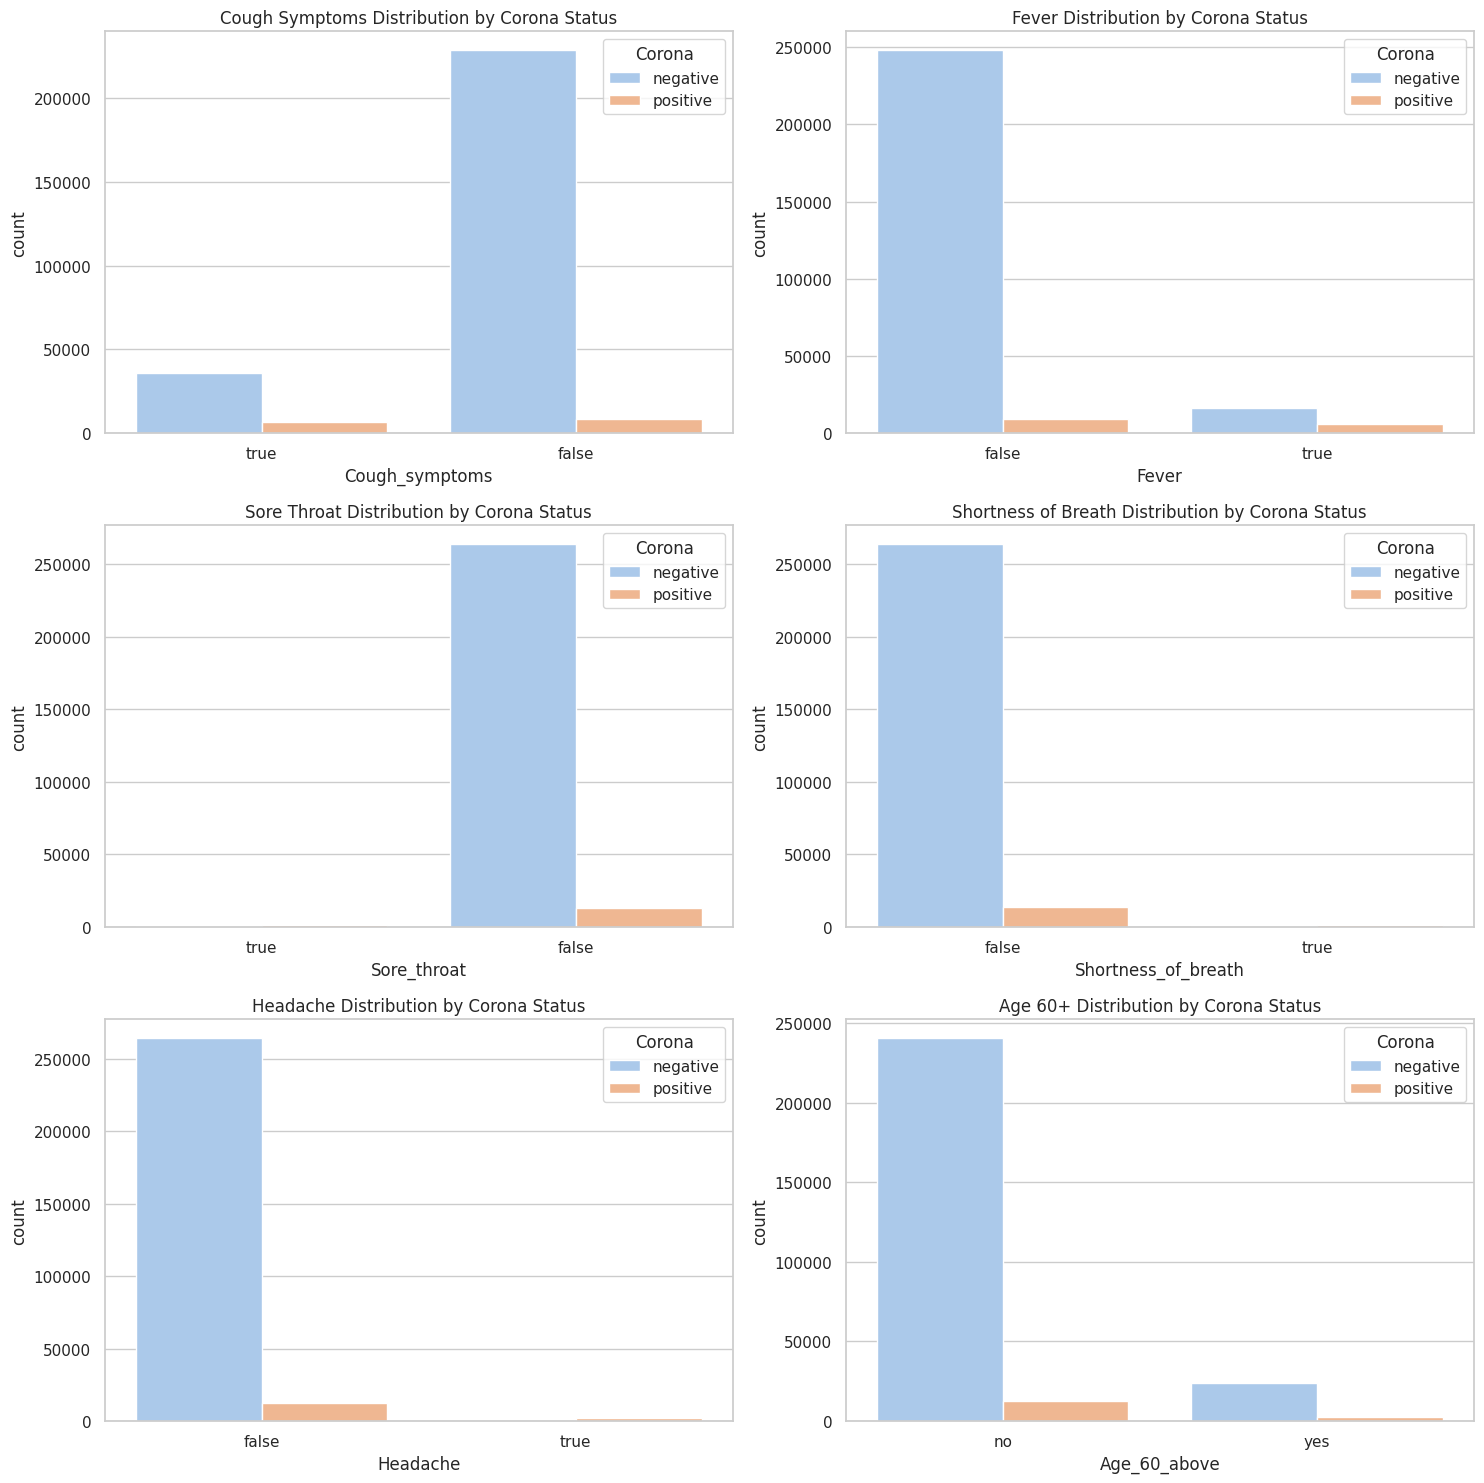

In [70]:

# Setting the style
sns.set(style="whitegrid")

# Setting the figure size
plt.figure(figsize=(15, 15))

# Countplot for Cough_symptoms
plt.subplot(3, 2, 1)
sns.countplot(data=covid_df, x='Cough_symptoms', hue='Corona', palette='pastel')
plt.title('Cough Symptoms Distribution by Corona Status')

# Countplot for Fever
plt.subplot(3, 2, 2)
sns.countplot(data=covid_df, x='Fever', hue='Corona', palette='pastel')
plt.title('Fever Distribution by Corona Status')

# Countplot for Sore_throat
plt.subplot(3, 2, 3)
sns.countplot(data=covid_df, x='Sore_throat', hue='Corona', palette='pastel')
plt.title('Sore Throat Distribution by Corona Status')

# Countplot for Shortness_of_breath
plt.subplot(3, 2, 4)
sns.countplot(data=covid_df, x='Shortness_of_breath', hue='Corona', palette='pastel')
plt.title('Shortness of Breath Distribution by Corona Status')

# Countplot for Headache
plt.subplot(3, 2, 5)
sns.countplot(data=covid_df, x='Headache', hue='Corona', palette='pastel')
plt.title('Headache Distribution by Corona Status')

# Countplot for Age_60_above
plt.subplot(3, 2, 6)
sns.countplot(data=covid_df, x='Age_60_above', hue='Corona', palette='pastel')
plt.title('Age 60+ Distribution by Corona Status')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


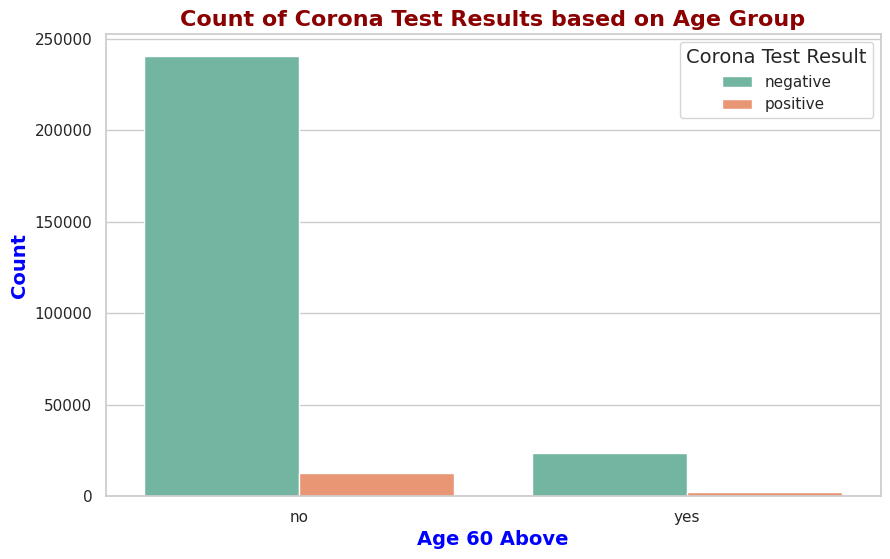

In [71]:
# Creating a Count Plot for Age_60_above in Corona Test Results

# Setting the figure size
plt.figure(figsize=(10, 6))

# Count plot
sns.countplot(x='Age_60_above', hue='Corona', data=covid_df, palette='Set2')

# Adding labels and title
plt.xlabel("Age 60 Above", size=14, color="blue", fontweight="bold")
plt.ylabel("Count", size=14, color="blue", fontweight="bold")
plt.title("Count of Corona Test Results based on Age Group", size=16, color="darkred", fontweight="bold")

# Adding legend for better interpretation
plt.legend(title='Corona Test Result', title_fontsize='14', loc='upper right')

# Display the visualization
plt.show()


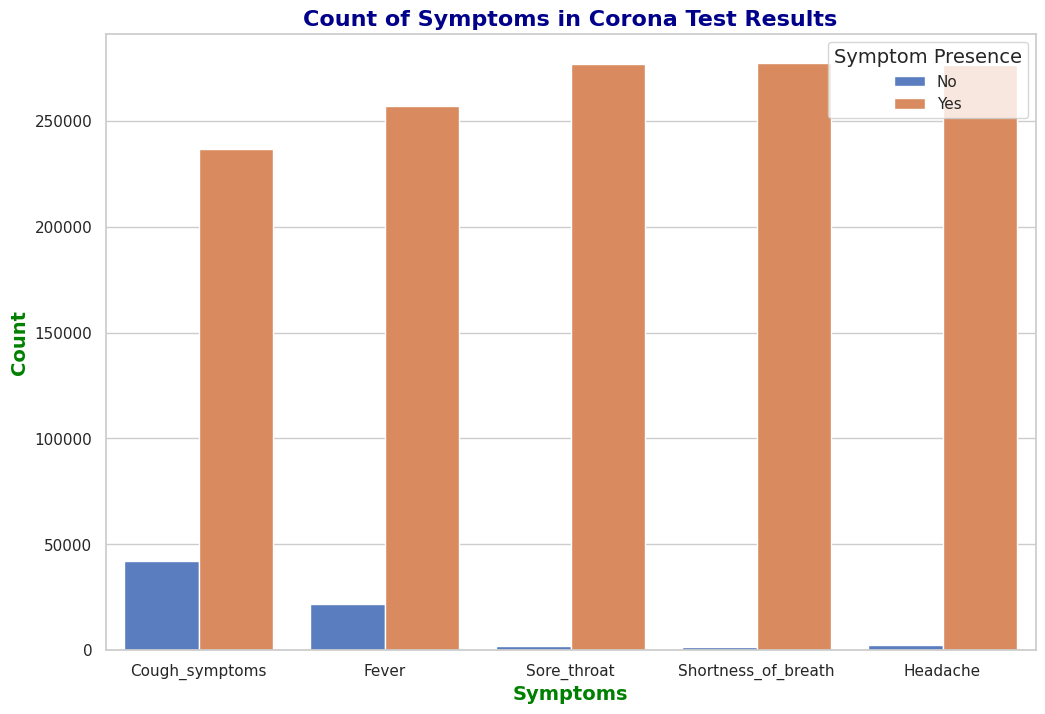

In [72]:
# Creating a Count Plot for Symptoms in Corona Test Results

# Setting the figure size
plt.figure(figsize=(12, 8))

# Melt the dataframe to reshape it for better plotting
melted_df = pd.melt(covid_df, id_vars=['Corona'], value_vars=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'])

# Count plot
sns.countplot(x='variable', hue='value', data=melted_df, palette='muted')

# Adding labels and title
plt.xlabel("Symptoms", size=14, color="green", fontweight="bold")
plt.ylabel("Count", size=14, color="green", fontweight="bold")
plt.title("Count of Symptoms in Corona Test Results", size=16, color="darkblue", fontweight="bold")

# Adding legend for better interpretation
plt.legend(title='Symptom Presence', title_fontsize='14', loc='upper right', labels=['No', 'Yes'])

# Display the visualization
plt.show()


# **Feature engineering**

#encoding

In [73]:
covid_df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,true,false,true,false,false,negative,no,female,Abroad
1,2020-03-11,false,true,false,false,false,positive,no,female,Abroad
2,2020-03-11,false,true,false,false,false,positive,no,female,Abroad
3,2020-03-11,true,false,false,false,false,negative,no,female,Abroad
4,2020-03-11,true,false,false,false,false,negative,no,female,Contact with confirmed


In [74]:
covid_df = pd.get_dummies(covid_df, columns=['Cough_symptoms', 'Fever', 'Sore_throat', 'Sex','Shortness_of_breath', 'Headache'], drop_first=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
covid_df['Corona'] = label_encoder.fit_transform(covid_df['Corona'])
covid_df['Age_60_above'] = label_encoder.fit_transform(covid_df['Age_60_above'])
covid_df['Known_contact'] = label_encoder.fit_transform(covid_df['Known_contact'])


In [75]:
covid_df.head()

,Test_date,Corona,Age_60_above,Known_contact,Cough_symptoms_true,Fever_true,Sore_throat_true,Sex_male,Shortness_of_breath_true,Headache_true
0,2020-03-11,0,0,0,1,0,1,0,0,0
1,2020-03-11,1,0,0,0,1,0,0,0,0
2,2020-03-11,1,0,0,0,1,0,0,0,0
3,2020-03-11,0,0,0,1,0,0,0,0,0
4,2020-03-11,0,0,1,1,0,0,0,0,0


In [76]:
# Counting the values of the categirical variables
columns_of_interest = ['Corona', 'Age_60_above', 'Known_contact',
       'Cough_symptoms_true', 'Fever_true', 'Sore_throat_true', 'Sex_male',
       'Shortness_of_breath_true', 'Headache_true']

for column in columns_of_interest:
    print(f"{column}:\n{covid_df[column].value_counts()}\n{'---'*20}")

Corona:
0    264119
1     14729
Name: Corona, dtype: int64
------------------------------------------------------------
Age_60_above:
0    253023
1     25825
Name: Age_60_above, dtype: int64
------------------------------------------------------------
Known_contact:
2    242741
0     25468
1     10639
Name: Known_contact, dtype: int64
------------------------------------------------------------
Cough_symptoms_true:
0    236620
1     42228
Name: Cough_symptoms_true, dtype: int64
------------------------------------------------------------
Fever_true:
0    257096
1     21752
Name: Fever_true, dtype: int64
------------------------------------------------------------
Sore_throat_true:
0    276922
1      1926
Name: Sore_throat_true, dtype: int64
------------------------------------------------------------
Sex_male:
0    149721
1    129127
Name: Sex_male, dtype: int64
------------------------------------------------------------
Shortness_of_breath_true:
0    277271
1      1577
Name: Shortnes

In [77]:
# Convert 'Test_date' to datetime format
covid_df['Test_date'] = pd.to_datetime(covid_df['Test_date'])

In [78]:
# Split the data into features (X) and labels (y)
X = covid_df.drop(columns=['Corona'])
y = covid_df['Corona']

In [79]:

# Define the date ranges for training, validation, and test sets
train_val_start = '2020-03-11'
train_val_end = '2020-04-15'
test_start = '2020-04-16'
test_end = '2020-04-30'

# Filter the data based on date ranges
train_val_data = covid_df[(covid_df['Test_date'] >= train_val_start) & (covid_df['Test_date'] <= train_val_end)]
test_data = covid_df[(covid_df['Test_date'] >= test_start) & (covid_df['Test_date'] <= test_end)]

# Further split training and validation data
train_data = train_val_data[train_val_data['Test_date'] <= '2020-04-05']
val_data = train_val_data[train_val_data['Test_date'] > '2020-04-05']

# Split the data into features and labels for training and testing with a 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the datasets
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (223078, 9)
y_train Shape: (223078,)
X_test Shape: (55770, 9)
y_test Shape: (55770,)


In [80]:
# Extract useful features from 'Test_date'
X_train['year'] = X_train['Test_date'].dt.year
X_train['month'] = X_train['Test_date'].dt.month
X_train['day'] = X_train['Test_date'].dt.day

# Drop the original 'Test_date' column
X_train.drop(columns=['Test_date'], inplace=True)

# Extract useful features from 'Test_date' in X_test
X_test['year'] = X_test['Test_date'].dt.year
X_test['month'] = X_test['Test_date'].dt.month
X_test['day'] = X_test['Test_date'].dt.day

# Drop the original 'Test_date' column
X_test.drop(columns=['Test_date'], inplace=True)

In [81]:
X_train

,Age_60_above,Known_contact,Cough_symptoms_true,Fever_true,Sore_throat_true,Sex_male,Shortness_of_breath_true,Headache_true,year,month,day
267278,0,2,0,0,0,1,0,0,2020,4,29
144659,0,2,0,0,0,0,0,0,2020,4,13
109640,0,2,0,0,0,1,0,0,2020,4,6
172733,0,2,1,0,0,0,0,0,2020,4,17
54864,1,1,0,0,0,1,0,0,2020,3,30
...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,1,0,0,1,0,0,2020,4,8
259178,0,0,1,0,0,1,0,0,2020,4,27
131932,0,2,0,0,0,0,0,0,2020,4,11
146867,0,2,0,0,0,0,0,0,2020,4,13


In [82]:
y_train

267278    0
144659    0
109640    0
172733    0
54864     1
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Corona, Length: 223078, dtype: int64

In [83]:
X_test



,Age_60_above,Known_contact,Cough_symptoms_true,Fever_true,Sore_throat_true,Sex_male,Shortness_of_breath_true,Headache_true,year,month,day
1943,0,2,0,0,0,0,0,0,2020,3,14
50392,0,2,0,0,0,0,0,0,2020,3,29
179856,0,2,0,0,0,1,0,0,2020,4,17
161573,0,2,0,0,0,0,0,0,2020,4,15
167293,0,2,0,0,0,0,0,0,2020,4,16
...,...,...,...,...,...,...,...,...,...,...,...
88590,0,2,0,0,0,0,0,0,2020,4,3
86286,0,2,0,0,0,1,0,0,2020,4,3
236911,0,2,0,0,0,0,0,0,2020,4,24
19997,1,2,0,0,0,0,0,0,2020,3,23


In [84]:
y_test

1943      0
50392     0
179856    0
161573    0
167293    0
         ..
88590     0
86286     0
236911    0
19997     0
141914    0
Name: Corona, Length: 55770, dtype: int64

###***Now the data is succssfully splited in X_train,y_train,X_test and y_test.Now our dataset is ready for model training.***  

#**Model Implimentation**

In [85]:

def compare_models_train_test(X_train, X_test, y_train, y_test):
    models = [RandomForestClassifier(), XGBClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

    for model in models:
        # Training the model
        model.fit(X_train, y_train)

        # Evaluating the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred) * 100
        recall = recall_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred) * 100
        confusion_mat = confusion_matrix(y_test, y_pred)

        # Print the results
        print(f"{type(model).__name__} Results:")
        print("Accuracy: {:.2f}%".format(accuracy))
        print("Precision: {:.2f}%".format(precision))
        print("Recall: {:.2f}%".format(recall))
        print("F1 Score: {:.2f}%".format(f1))
        print("Confusion Matrix:")
        print(confusion_mat)
        print("\n")

In [86]:
compare_models_train_test(X_train, X_test, y_train, y_test)

RandomForestClassifier Results:
Accuracy: 96.96%
Precision: 77.86%
Recall: 59.02%
F1 Score: 67.14%
Confusion Matrix:
[[52339   493]
 [ 1204  1734]]


XGBClassifier Results:
Accuracy: 97.06%
Precision: 78.27%
Recall: 61.16%
F1 Score: 68.67%
Confusion Matrix:
[[52333   499]
 [ 1141  1797]]


KNeighborsClassifier Results:
Accuracy: 96.47%
Precision: 73.04%
Recall: 52.38%
F1 Score: 61.01%
Confusion Matrix:
[[52264   568]
 [ 1399  1539]]


DecisionTreeClassifier Results:
Accuracy: 96.92%
Precision: 78.30%
Recall: 57.35%
F1 Score: 66.21%
Confusion Matrix:
[[52365   467]
 [ 1253  1685]]




#**Hyperparameter Tuning Using Randomized Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define hyperparameter grids for each model
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

xgb_param_grid = {
    'subsample': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.1, 0.2, 0.3],
    'colsample_bytree': [0.8, 1.0]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# List of models and their corresponding hyperparameter grids
models = [
    (DecisionTreeClassifier(), dt_param_grid),
    (RandomForestClassifier(), rf_param_grid),
    (XGBClassifier(), xgb_param_grid),
    (KNeighborsClassifier(), knn_param_grid)
]

def hyperparameter_tuning(X_train, X_test, y_train, y_test):
    for model, param_grid in models:
        # Create RandomizedSearchCV instance
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)

        # Fit the model with hyperparameter tuning
        random_search.fit(X_train, y_train)

        # Print the best parameters found by RandomizedSearchCV
        print(f"Best {type(model).__name__} Parameters:", random_search.best_params_)

        # Evaluate the model
        y_pred = random_search.best_estimator_.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred) * 100
        recall = recall_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred) * 100
        confusion_mat = confusion_matrix(y_test, y_pred)

        # Print the results
        print(f"{type(model).__name__} Results:")
        print("Accuracy: {:.2f}%".format(accuracy))
        print("Precision: {:.2f}%".format(precision))
        print("Recall: {:.2f}%".format(recall))
        print("F1 Score: {:.2f}%".format(f1))
        print("Confusion Matrix:")
        print(confusion_mat)
        print("\n")




In [ ]:
hyperparameter_tuning(X_train, X_test, y_train, y_test)

Best DecisionTreeClassifier Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
DecisionTreeClassifier Results:
Accuracy: 97.03%
Precision: 79.19%
Recall: 59.05%
F1 Score: 67.65%
Confusion Matrix:
[[52376   456]
 [ 1203  1735]]


Best RandomForestClassifier Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
RandomForestClassifier Results:
Accuracy: 97.03%
Precision: 80.61%
Recall: 57.32%
F1 Score: 67.00%
Confusion Matrix:
[[52427   405]
 [ 1254  1684]]


Best XGBClassifier Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
XGBClassifier Results:
Accuracy: 97.09%
Precision: 78.43%
Recall: 61.64%
F1 Score: 69.03%
Confusion Matrix:
[[52334   498]
 [ 1127  1811]]


Best KNeighborsClassifier Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 9}
KNeighborsClassifier Results:
Accuracy: 96.78%
Precision: 77.97%

#**Implimenting the K-fold cross-validation techinique**

In [ ]:
X['year'] = X['Test_date'].dt.year
X['month'] = X['Test_date'].dt.month
X['day'] = X['Test_date'].dt.day

# Drop the original 'Test_date' column
X.drop(columns=['Test_date'], inplace=True)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def compare_models_kfold(X, y, num_folds=5):
    models = [RandomForestClassifier(), XGBClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

    for model in models:
        # Create a k-fold cross-validation instance
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

        # Perform k-fold cross-validation
        accuracy = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        precision = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(precision_score))
        recall = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(recall_score))
        f1 = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(f1_score))

        # Print the results
        print(f"{type(model).__name__} Results (k-fold Cross-Validation):")
        print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(accuracy.mean() * 100, accuracy.std() * 2 * 100))
        print("Precision: {:.2f}% (+/- {:.2f}%)".format(precision.mean() * 100, precision.std() * 2 * 100))
        print("Recall: {:.2f}% (+/- {:.2f}%)".format(recall.mean() * 100, recall.std() * 2 * 100))
        print("F1 Score: {:.2f}% (+/- {:.2f}%)".format(f1.mean() * 100, f1.std() * 2 * 100))
        print("\n")




In [ ]:
compare_models_kfold(X, y)

RandomForestClassifier Results (k-fold Cross-Validation):
Accuracy: 97.01% (+/- 0.05%)
Precision: 78.10% (+/- 1.19%)
Recall: 60.41% (+/- 2.22%)
F1 Score: 68.06% (+/- 1.25%)


XGBClassifier Results (k-fold Cross-Validation):
Accuracy: 97.09% (+/- 0.09%)
Precision: 78.56% (+/- 0.86%)
Recall: 61.75% (+/- 2.10%)
F1 Score: 69.15% (+/- 1.53%)


KNeighborsClassifier Results (k-fold Cross-Validation):
Accuracy: 96.66% (+/- 0.08%)
Precision: 75.84% (+/- 2.01%)
Recall: 54.00% (+/- 2.00%)
F1 Score: 63.08% (+/- 1.42%)


DecisionTreeClassifier Results (k-fold Cross-Validation):
Accuracy: 96.94% (+/- 0.04%)
Precision: 78.30% (+/- 0.88%)
Recall: 58.18% (+/- 1.84%)
F1 Score: 66.74% (+/- 1.22%)




#**Hyperparameter Tuning Using Randomized Search**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from scipy.stats import randint, uniform

def compare_models_kfold_hyperparam_tuning(X, y, num_folds=5, num_iterations=50):
    models = [
        {
            'model': RandomForestClassifier(),
            'param_grid': {
                'n_estimators': randint(10, 200),
                'max_depth': randint(1, 20),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
            }
        },
        {
            'model': XGBClassifier(),
            'param_grid': {
                'n_estimators': randint(10, 200),
                'max_depth': randint(1, 20),
                'learning_rate': uniform(0.01, 0.3),
                'subsample': uniform(0.1, 1),
                'colsample_bytree': uniform(0.1, 1),
            }
        },
        {
            'model': KNeighborsClassifier(),
            'param_grid': {
                'n_neighbors': randint(1, 30),
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
            }
        },
        {
            'model': DecisionTreeClassifier(),
            'param_grid': {
                'max_depth': randint(1, 20),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
            }
        },
    ]

    for model_info in models:
        model = model_info['model']
        param_grid = model_info['param_grid']

        # Create a k-fold cross-validation instance
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

        # Perform hyperparameter tuning using RandomizedSearchCV
        randomized_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=num_iterations, cv=kfold, scoring='accuracy', random_state=42, n_jobs=-1)
        randomized_search.fit(X, y)

        # Get the best hyperparameters
        best_params = randomized_search.best_params_

        # Use the best hyperparameters to create the model
        best_model = model.__class__(**best_params)

        # Perform cross-validation using the best model
        precision = cross_val_score(best_model, X, y, cv=kfold, scoring=make_scorer(precision_score)).mean()
        recall = cross_val_score(best_model, X, y, cv=kfold, scoring=make_scorer(recall_score)).mean()
        f1 = cross_val_score(best_model, X, y, cv=kfold, scoring=make_scorer(f1_score)).mean()

        # Print the results
        print(f"Best hyperparameters for {type(model).__name__}:")
        print(best_params)
        print(f"Best Precision: {precision:.2f}")
        print(f"Best Recall: {recall:.2f}")
        print(f"Best F1 Score: {f1:.2f}")
        print("\n")

# Make sure to call the function with appropriate X, y values
# For example:
# compare_models_kfold_hyperparam_tuning(X, y)


In [ ]:
compare_models_kfold_hyperparam_tuning(X, y)

Best hyperparameters for RandomForestClassifier:
{'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 133}
Best Precision: 0.79
Best Recall: 0.61
Best F1 Score: 0.69


Best hyperparameters for XGBClassifier:
{'colsample_bytree': 0.6612771975694962, 'learning_rate': 0.2412901539863683, 'max_depth': 7, 'n_estimators': 36, 'subsample': 0.622732829381994}
Best Precision: 0.79
Best Recall: 0.62
Best F1 Score: 0.69


Best hyperparameters for KNeighborsClassifier:
{'n_neighbors': 17, 'p': 2, 'weights': 'distance'}
Best Precision: 0.78
Best Recall: 0.55
Best F1 Score: 0.65


Best hyperparameters for DecisionTreeClassifier:
{'max_depth': 13, 'min_samples_leaf': 9, 'min_samples_split': 16}
Best Precision: 0.79
Best Recall: 0.61
Best F1 Score: 0.69




# **Conclusion**

##**In conclusion, the project aimed to predict COVID-19 test outcomes using machine learning models. Four different classifiers, namely RandomForestClassifier, XGBClassifier, KNeighborsClassifier, and DecisionTreeClassifier, were trained and evaluated. The results demonstrated high accuracy across all models, with XGBClassifier achieving the highest accuracy of 97.06%. Precision, recall, and F1 score were also considered, revealing varying performance in different aspects. The confusion matrices provided a detailed view of true positives, true negatives, false positives, and false negatives for each model. This comprehensive analysis allows for a thorough understanding of the models' strengths and weaknesses in predicting COVID-19 outcomes. The implementation of machine learning in this context provides a valuable tool for efficient and accurate screening, contributing to effective healthcare management during challenging times.**

# **Thank You**